# **EDA1**
**Bike Details Dataset**

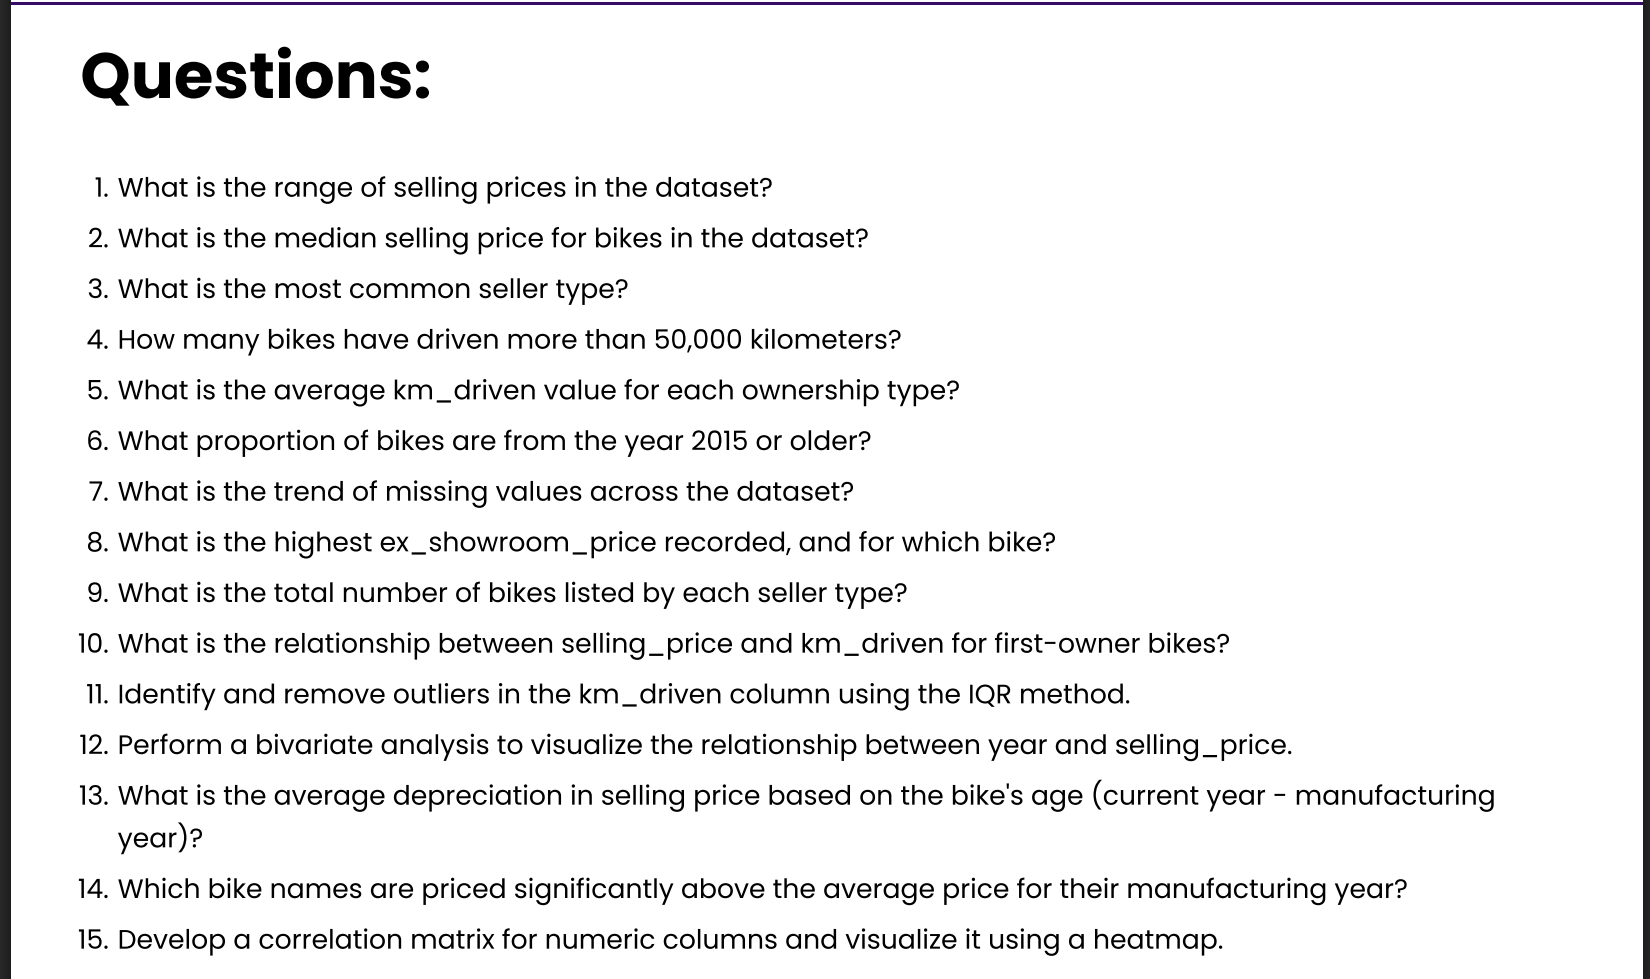

In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [327]:
bike_df=pd.read_csv("BIKE DETAILS.csv")

In [328]:
bike_df.sort_values(by="selling_price", ascending=False).head()

name  selling_price  year seller_type  \
295                 Suzuki GSX S750         760000  2019  Individual   
134      Harley-Davidson Street Bob         750000  2013  Individual   
289  Kawasaki Ninja 650 [2018-2019]         425000  2017  Individual   
13                    Yamaha YZF R3         365000  2019  Individual   
311      Harley-Davidson Street 750         330000  2014  Individual   

         owner  km_driven  ex_showroom_price  
295  1st owner       2800           752020.0  
134  2nd owner      12000          1278000.0  
289  2nd owner      13600           599000.0  
13   1st owner       1127           351680.0  
311  4th owner       6500           534000.0

In [329]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [330]:
#1. What is the range of selling prices in the dataset?

max_sp=bike_df["selling_price"].max()
min_sp=bike_df["selling_price"].min()
range_sp= max_sp - min_sp

print("Range of selling prices is:", range_sp)

Range of selling prices is: 755000


In [331]:
#2. What is the median selling price for bikes in the dataset?

median_sp=bike_df["selling_price"].median()
print("Median Selling Price is:",median_sp)

Median Selling Price is: 45000.0


In [332]:
#3. What is the most common seller type?

comm_seller=bike_df["seller_type"].mode()[0]
print("Most common seller type is:", comm_seller)

Most common seller type is: Individual


In [333]:
#4. How many bikes have driven more than 50,000 kilometers?

res=bike_df[bike_df["km_driven"]>50000]["name"].count()
print(res,"bikes have driven more than 50,000 kilometers")

170 bikes have driven more than 50,000 kilometers


In [334]:
#5. What is the average km_driven value for each ownership type?

print("Average km_driven for each ownership type:\n")

round(bike_df.groupby('owner')["km_driven"].mean(),2).reset_index()


Average km_driven for each ownership type:



owner  km_driven
0  1st owner   32816.58
1  2nd owner   39288.99
2  3rd owner   33292.18
3  4th owner  311500.00

In [335]:
#6.  What proportion of bikes are from the year 2015 or older?

y=(bike_df[bike_df["year"]<=2015]["name"].count()/len(bike_df))*100
print(f"Proportion of bikes from the year 2015 and older are: {y:.2f}")

Proportion of bikes from the year 2015 and older are: 56.64


In [336]:
#7. What is the trend of missing values across the dataset?

print("Missing values across the dataset\n")
bike_df.isnull().sum().sort_values(ascending=False)


Missing values across the dataset



ex_showroom_price    435
selling_price          0
name                   0
year                   0
seller_type            0
owner                  0
km_driven              0
dtype: int64

In [337]:
#8. What is the highest ex_showroom_price recorded, and for which bike?

bike_name=bike_df[bike_df["ex_showroom_price"]==bike_df["ex_showroom_price"].max()][["name","ex_showroom_price"]].reset_index(drop=True)

name = bike_name.loc[0, "name"]
price = bike_name.loc[0, "ex_showroom_price"]

print(f"Bike Name: {name}")
print(f"Ex-Showroom Price: {price}")

Bike Name: Harley-Davidson Street Bob
Ex-Showroom Price: 1278000.0


In [338]:
#9.  What is the total number of bikes listed by each seller type?

bike_df.groupby("seller_type")["name"].count().reset_index(name="total_bikes")

seller_type  total_bikes
0      Dealer            6
1  Individual         1055

In [339]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?

corr_df=bike_df[bike_df["owner"]=="1st owner"][["selling_price", "km_driven"]].corr().loc["selling_price","km_driven"]
print(f"There is a negative correlation between selling_price and km_driven for first-owner bike.\nValue of correlation coefficient is {corr_df:.2f}")

There is a negative correlation between selling_price and km_driven for first-owner bike.
Value of correlation coefficient is -0.24


In [340]:
#11. Identify and remove outliers in the km_driven column using the IQR method.

Q1=bike_df["km_driven"].quantile(0.25)
Q3=bike_df["km_driven"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_filtered=bike_df[(bike_df["km_driven"]>=lower_bound)&(bike_df["km_driven"]<=upper_bound)].reset_index(drop=True)
df_filtered

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1017                     Hero  CBZ Xtreme          20000  2010  Individual   
1018                        Bajaj  ct 100          18000  2017  Individual   
1019                     Honda CB twister          16000  2012  Individual   
1020                   Bajaj Discover 125          15000  2013  Individual   
1021                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1017  1st owner      50000            78700.0  
1018  1st owner      35000            32000.0  
1019  1st owner      33000            51000.0  
1020  2nd owner      35000            57000.0  
1021  1st owner      53000            58000.0  

[1022 rows x 7 columns]

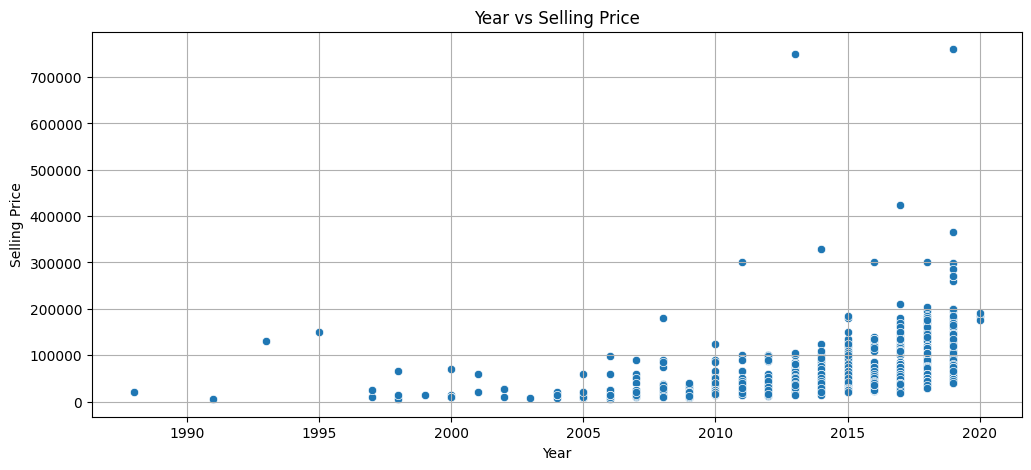

In [341]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

plt.figure(figsize=(12,5))
sns.scatterplot(data=bike_df, x="year", y="selling_price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price")
plt.grid()
plt.show()



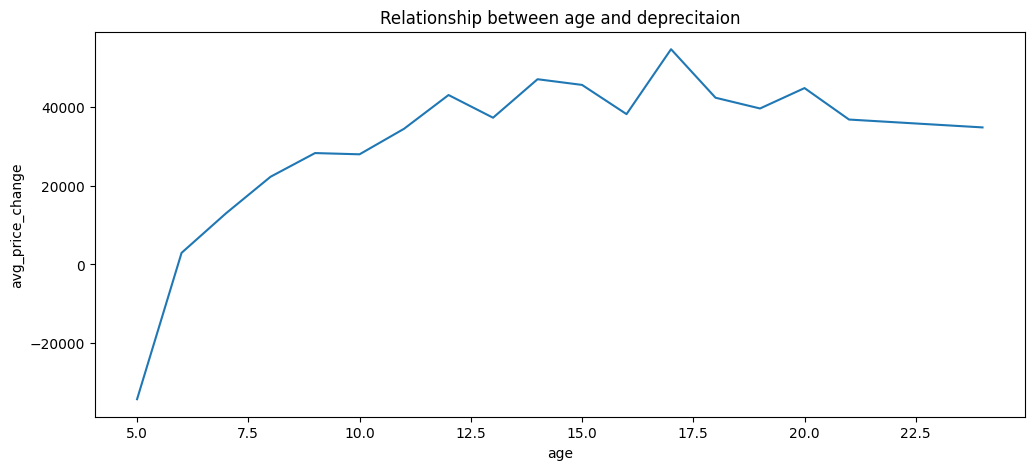


Interpetation:
As we can see in the graph as age of bike increases average depreciation also increases


In [342]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?

current_year=2025
bike_df["age"]=current_year - bike_df["year"]
subset_df=bike_df.dropna(subset=["ex_showroom_price"]).reset_index(drop=True)
subset_df["price_change"]=subset_df["ex_showroom_price"]-subset_df["selling_price"]
avg_depreciation=subset_df.groupby("age")["price_change"].mean().reset_index().rename(columns={"price_change":"avg_price_change"})

plt.figure(figsize=(12,5))
sns.lineplot(data=avg_depreciation, x="age", y="avg_price_change")
plt.title("Relationship between age and deprecitaion")
plt.show()
print()
print("Interpetation:\nAs we can see in the graph as age of bike increases average depreciation also increases")

In [343]:
#14. Which bike names are priced significantly above the average price for their manufacturing year?

avg_price=bike_df.groupby("year")["selling_price"].mean().reset_index().rename(columns={"selling_price":"avg_selling_price"})
merged_df=bike_df.merge(avg_price, how="left", on="year")
high_priced_bikes = merged_df[merged_df["selling_price"] > 1.5 * merged_df["avg_selling_price"]].reset_index(drop=True)
print("Below are the bikes which are priced significantly above (>1.5*year_avg):\n")
print(high_priced_bikes["name"].unique())

Below are the bikes which are priced significantly above (>1.5*year_avg):

['Royal Enfield Classic Gunmetal Grey'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Royal Enfield Electra 5 S' 'Royal Enfield Bullet 350'
 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Hero Honda Karizma ZMR [2010]' 'Royal Enfield Thunderbird 350X'
 'Royal Enfield Classic Desert Storm' 'Yamaha FZ25' 'UM Renegade Commando'
 'Royal Enfield Classic 350' 'Royal Enfield Continental GT 650'
 'Harley-Davidson Street Bob' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Classic 500' 'KTM RC 390' 'Bajaj Pulsar 150' 'KTM RC 200'
 'Honda CB Unicorn 150' 'Royal Enfield Bullet 500'
 'Bajaj Dominar 400 [2018]' 'Royal Enfield Interceptor 650'
 'Royal Enfield Machismo' 'KTM 250 Duke' 'Kawasaki Ninja 650 [2018-2019]'
 'Kawasaki Ninja 250R' 'Suzuki GSX S750' 'Yamaha Rx' 'Yamaha Fazer Dlx'
 'Harley-Davidson Street 

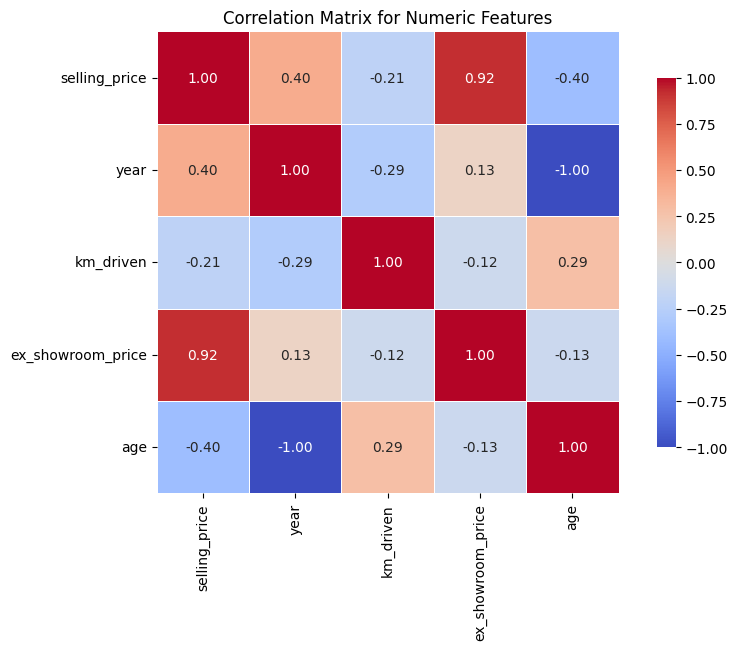

In [344]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

num_columns=[col for col in bike_df.columns if bike_df[col].dtype!="O" ]
corr_matrix=bike_df[num_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix for Numeric Features")
plt.show()

# **EDA 2**
**Car Sale Dataset**

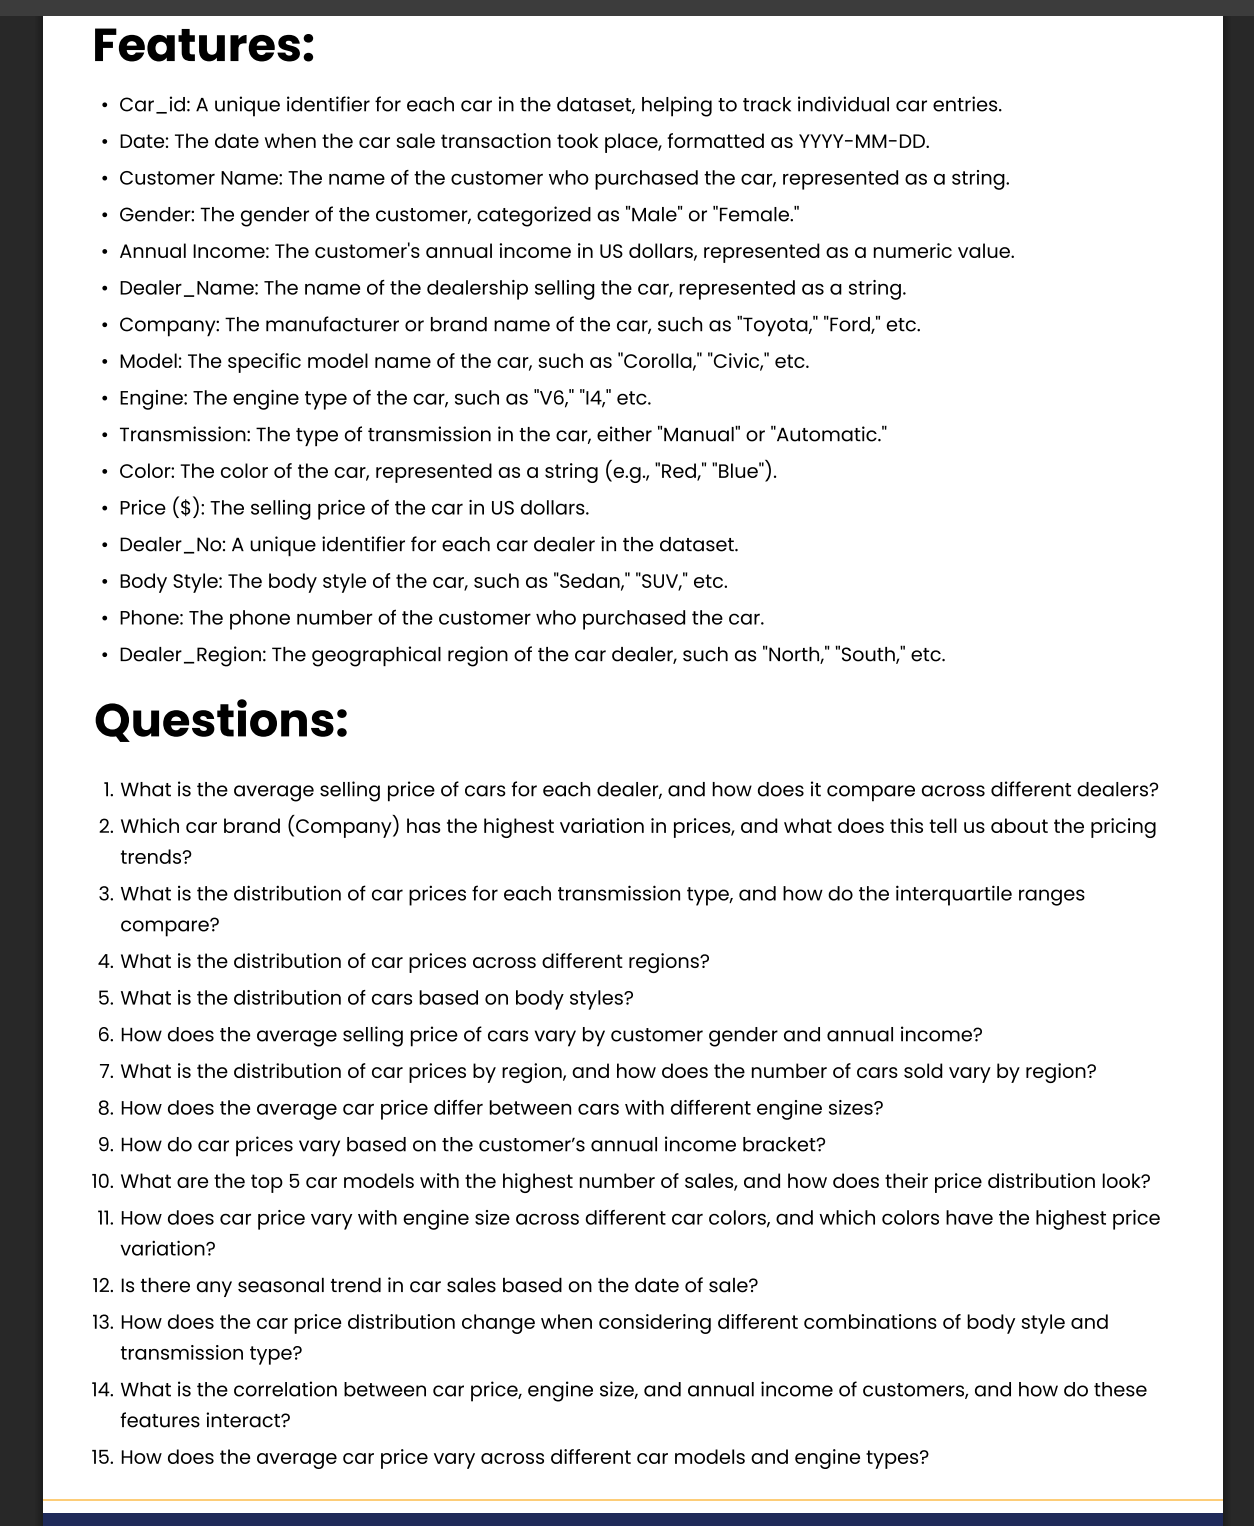


In [345]:
car_df= pd.read_csv("Car Sale.csv")

car_df.head()

Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [346]:
car_df.duplicated().sum()

np.int64(0)

In [347]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

avg_price_dealer=car_df.groupby("Dealer_Name")["Price ($)"].mean().reset_index().round(2).rename(columns={"Price ($)": "avg_price"})

avg_price_dealer


Dealer_Name  avg_price
0               Buddy Storbeck's Diesel Service Inc   27217.26
1                                  C & M Motors Inc   28111.76
2                                       Capitol KIA   28189.70
3                                 Chrysler Plymouth   27555.53
4                            Chrysler of Tri-Cities   28123.09
5                                     Classic Chevy   28602.01
6                           Clay Johnson Auto Sales   27816.03
7                                Diehl Motor CO Inc   27993.93
8                             Enterprise Rent A Car   28312.58
9                        Gartner Buick Hyundai Saab   28247.62
10                              Hatfield Volkswagen   27853.71
11                                  Iceberg Rentals   28522.96
12                     McKinney Dodge Chrysler Jeep   27684.10
13                      Motor Vehicle Branch Office   27956.74
14                                   Nebo Chevrolet   27818.89
15                  New Castle Ford Lincoln Mercury   27867.13
16                                  Pars Auto Sales   28013.06
17            Pitre Buick-Pontiac-Gmc of Scottsdale   27404.25
18  Progressive Shippers Cooperative Association No   27884.26
19                             Rabun Used Car Sales   28527.54
20                                    Race Car Help   28163.37
21                   Ryder Truck Rental and Leasing   27914.99
22                                 Saab-Belle Dodge   28190.14
23                Scrivener Performance Engineering   28297.37
24                             Star Enterprises Inc   28113.06
25                                    Suburban Ford   28112.21
26                               Tri-State Mack Inc   28095.56
27                                        U-Haul CO   28769.92

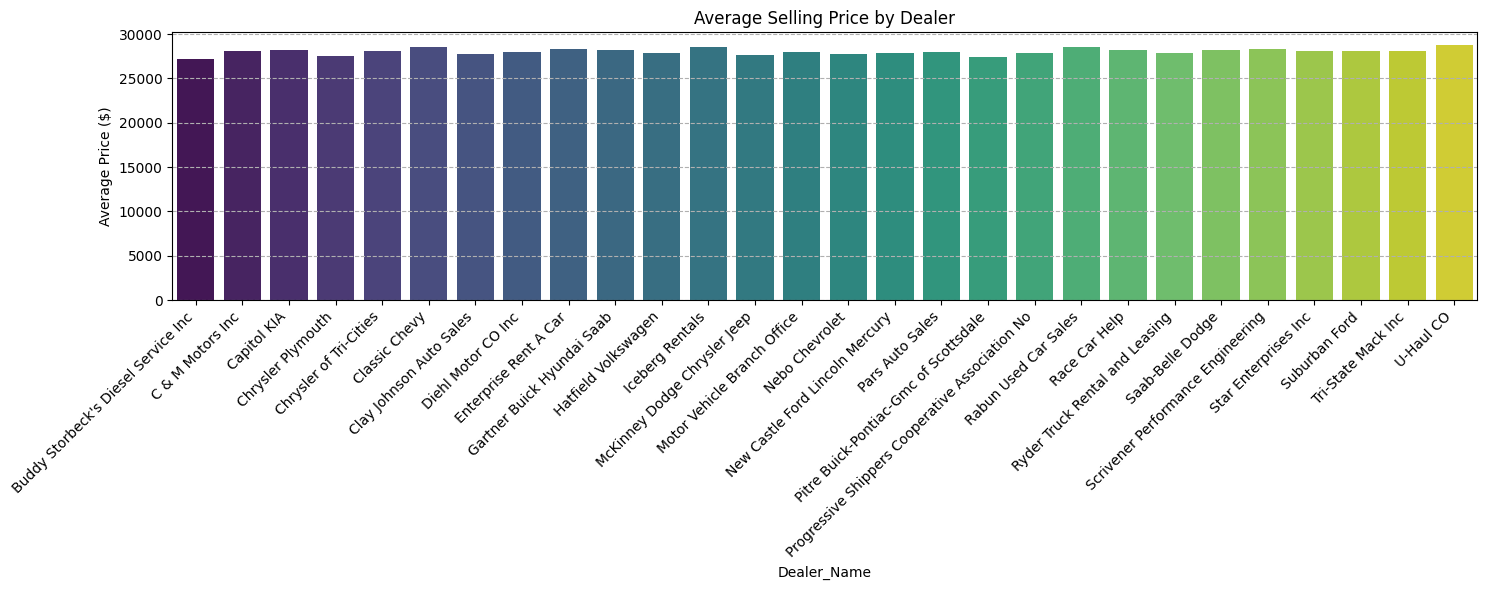

In [348]:
#continuation of Q.1

plt.figure(figsize=(15,6))
sns.barplot(data=avg_price_dealer, x="Dealer_Name", y="avg_price", palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("Average Selling Price by Dealer")
plt.ylabel("Average Price ($)")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()
plt.show()

In [349]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_var_brand=car_df.groupby("Company")["Price ($)"].std().reset_index().round(2).rename(columns={"Price ($)": "std"}).sort_values(by="std", ascending=False).reset_index(drop=True)

print(price_var_brand.loc[0,"Company"], "brand has the highest variation in prices")
print("This tell us that the brand offers cars across wide price range, likely catering to different market segments from economy to premium.")


Lincoln brand has the highest variation in prices
This tell us that the brand offers cars across wide price range, likely catering to different market segments from economy to premium.


In [350]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

trans_type=car_df.groupby("Transmission")["Price ($)"].agg(mean="mean", std="std", median=lambda x: x.quantile(0.5), iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)).round(2)
trans_type

mean       std   median      iqr
Transmission                                      
Auto          28248.53  13747.07  24000.0  16500.0
Manual        27914.71  15862.87  22001.0  17000.0

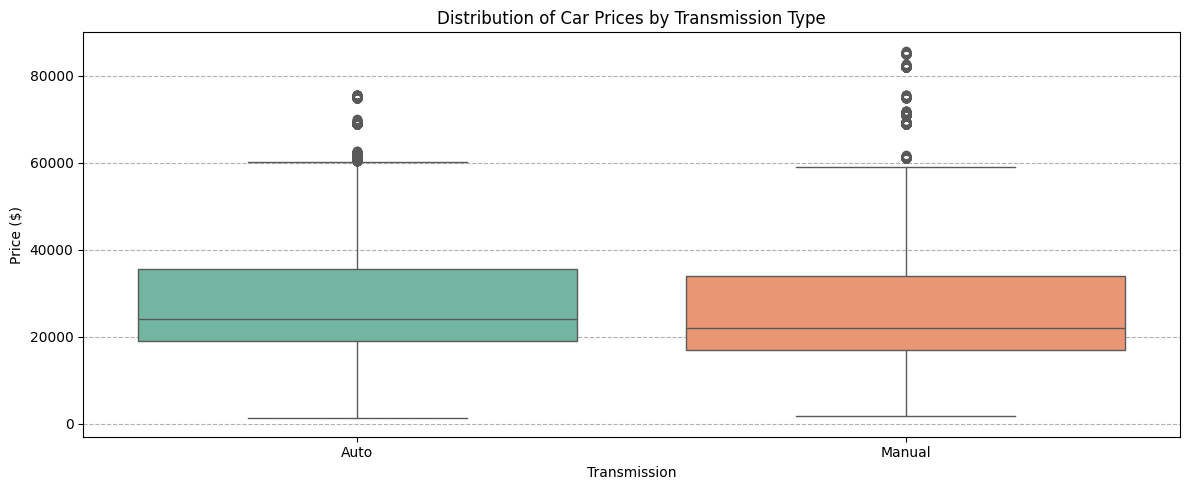

In [351]:
#continuation of Q.3

plt.figure(figsize=(12,5))
sns.boxplot(data=car_df, x="Transmission", y="Price ($)", palette="Set2")
plt.title("Distribution of Car Prices by Transmission Type")
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [352]:
#4. What is the distribution of car prices across different regions?

car_df.groupby("Dealer_Region")["Price ($)"].describe().round(2)

count      mean       std     min      25%      50%      75%  \
Dealer_Region                                                                  
Aurora         3130.0  28334.63  15026.21  9000.0  18001.0  23000.0  35000.0   
Austin         4135.0  28341.60  14903.88  9000.0  18001.0  23801.0  35001.0   
Greenville     3128.0  28180.82  15101.54  1200.0  18001.0  22500.0  34500.0   
Janesville     3821.0  27833.35  14345.00  4300.0  18001.0  23000.0  34000.0   
Middletown     3128.0  27856.34  14619.84  1700.0  18000.0  22750.0  34000.0   
Pasco          3131.0  28119.04  14659.32  9000.0  18500.5  23000.0  34000.0   
Scottsdale     3433.0  27954.96  14902.92  1450.0  18000.0  22600.0  33500.0   

                   max  
Dealer_Region           
Aurora         85800.0  
Austin         85601.0  
Greenville     85200.0  
Janesville     85400.0  
Middletown     85300.0  
Pasco          85600.0  
Scottsdale     85001.0

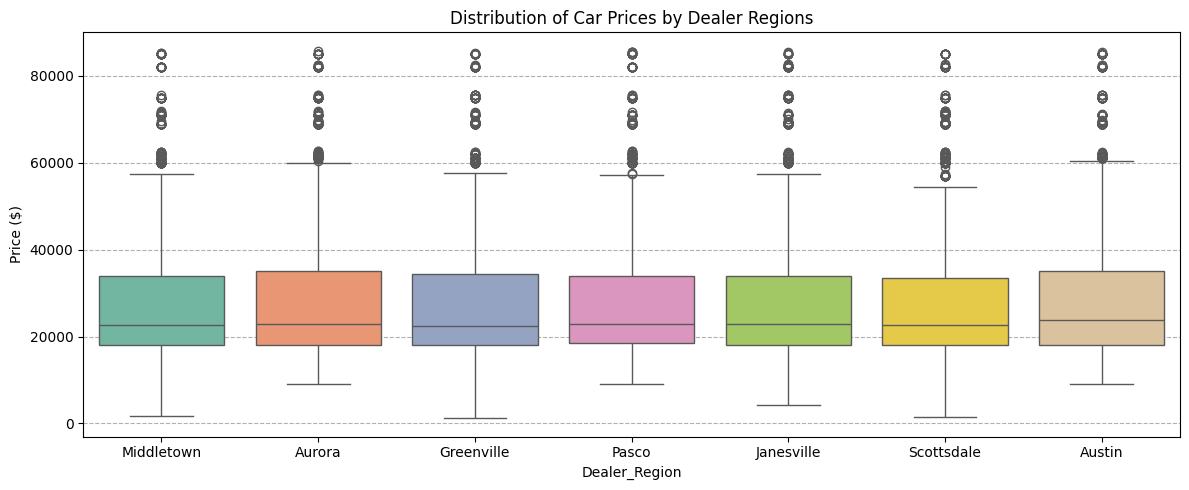

In [353]:
#continuation of Q.4

plt.figure(figsize=(12,5))
sns.boxplot(data=car_df, x="Dealer_Region", y="Price ($)", palette="Set2")
plt.title("Distribution of Car Prices by Dealer Regions")
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

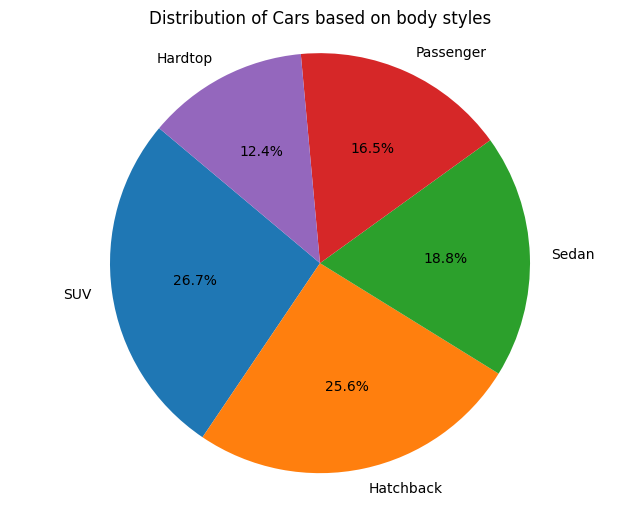

In [354]:
#5. What is the distribution of cars based on body styles?

car_dis=round(car_df["Body Style"].value_counts(normalize=True)*100,2)

plt.figure(figsize=(8, 6))
plt.pie(car_dis, labels=car_dis.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Cars based on body styles")
plt.axis("equal")
plt.show()

In [355]:
#6. How does the average selling price of cars vary by customer gender and annual income?

car_df.pivot_table(index="Annual Income", columns="Gender", values="Price ($)", aggfunc="mean").dropna().round(2)

Gender           Female      Male
Annual Income                    
13500          28132.04  27809.49
190000         19001.00  22000.00
240000         39000.00  33250.25
255000         43000.00  22000.00
260000         15001.00  22111.44
...                 ...       ...
4350000        34000.00  43500.00
4500000        18000.00  23000.50
4600000        41500.00  29500.50
4700000        17000.00  17000.50
6400000        32001.00  71000.00

[934 rows x 2 columns]

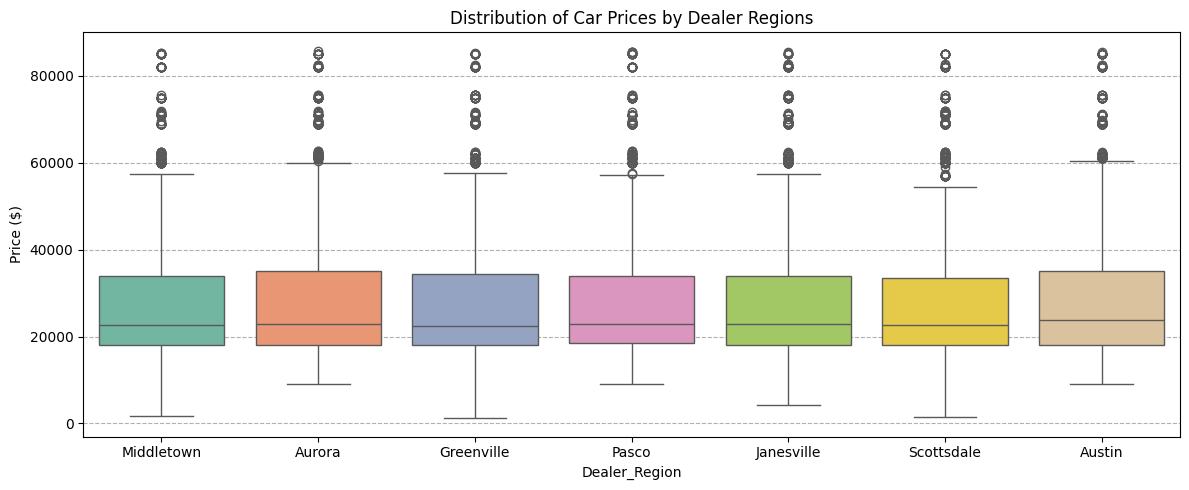

In [356]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region.


plt.figure(figsize=(12,5))
sns.boxplot(data=car_df, x="Dealer_Region", y="Price ($)", palette="Set2")
plt.title("Distribution of Car Prices by Dealer Regions")
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

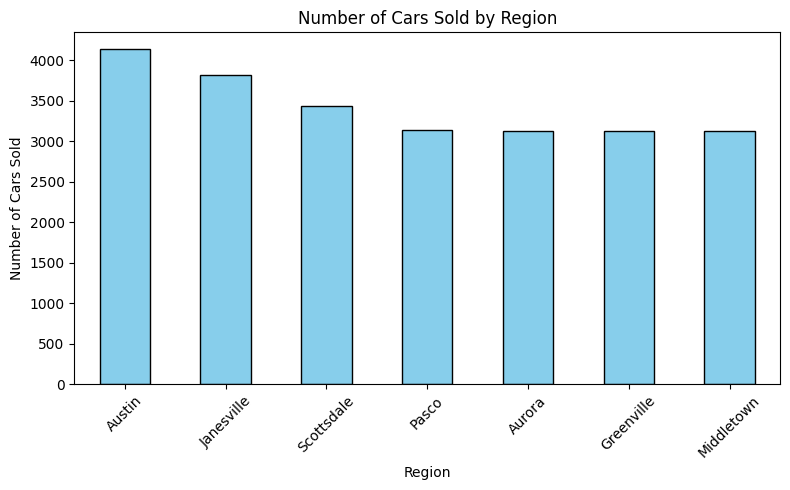

In [357]:
#continuation of Q.7

car_df["Dealer_Region"].value_counts().plot(
    kind="bar", figsize=(8,5), color="skyblue", edgecolor="black"
)
plt.title("Number of Cars Sold by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [358]:
#8. How does the average car price differ between cars with different engine sizes.

car_df.groupby("Engine")["Price ($)"].mean().round(2)

Engine
DoubleÂ Overhead Camshaft    28248.53
Overhead Camshaft            27914.71
Name: Price ($), dtype: float64

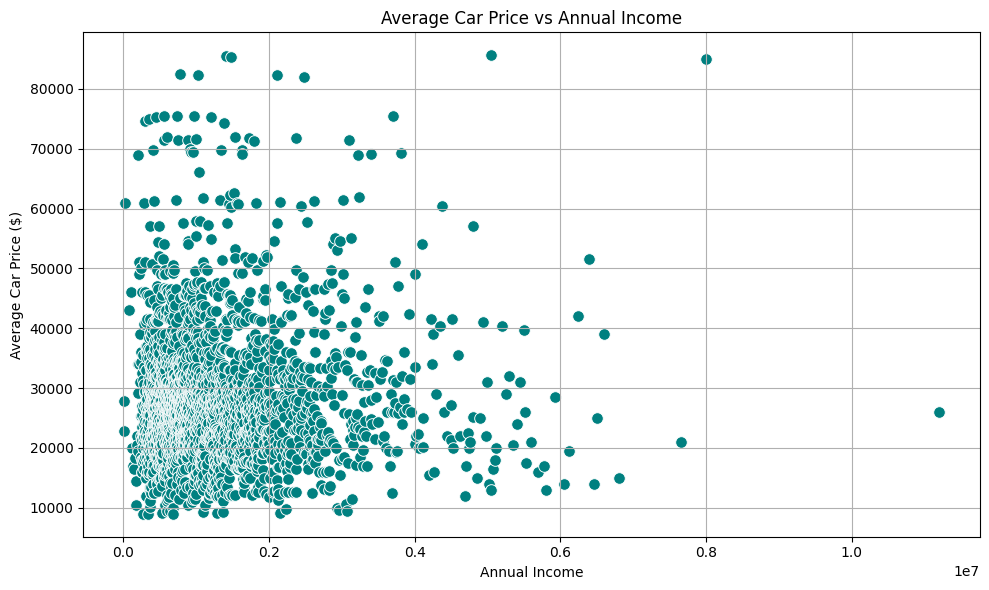

In [359]:
#9. How do car prices vary based on the customer’s annual income bracket?

car_price_by_income=car_df.groupby("Annual Income")["Price ($)"].mean().reset_index().sort_values(by="Annual Income")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_price_by_income, x="Annual Income", y="Price ($)", color="teal", s=70)
plt.title("Average Car Price vs Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Average Car Price ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

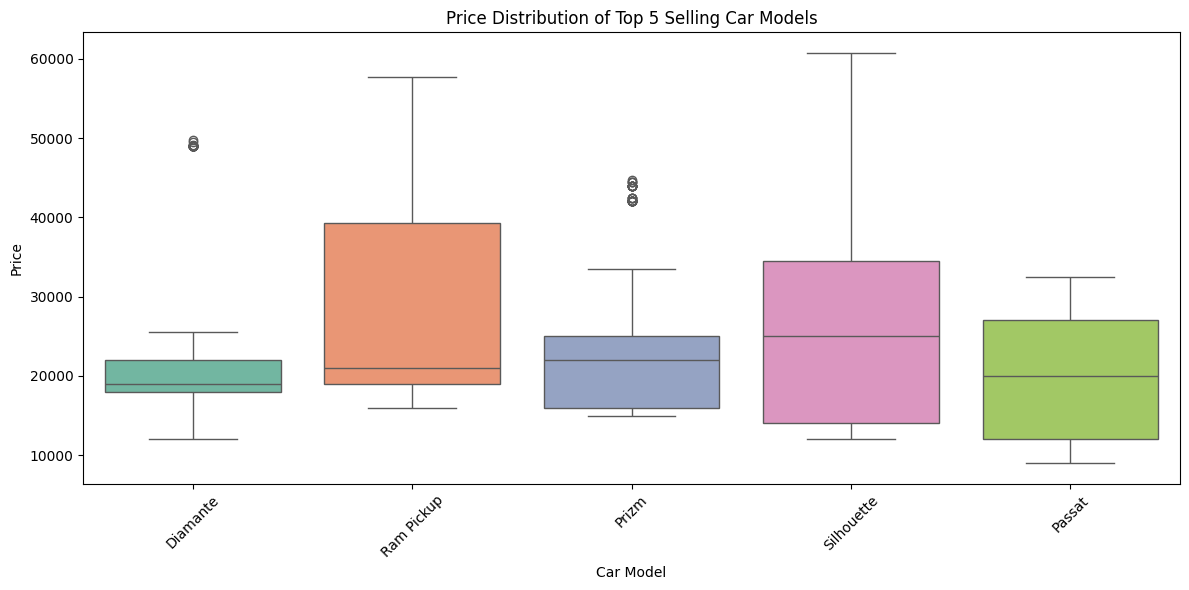

In [360]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_5_model=car_df.groupby("Model")["Car_id"].count().reset_index(name="count").sort_values(by="count", ascending=False).head(5)

top_5_df=car_df[car_df["Model"].isin(top_5_model["Model"])]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_5_df, x="Model", y="Price ($)", palette="Set2")
plt.title("Price Distribution of Top 5 Selling Car Models")
plt.ylabel("Price")
plt.xlabel("Car Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

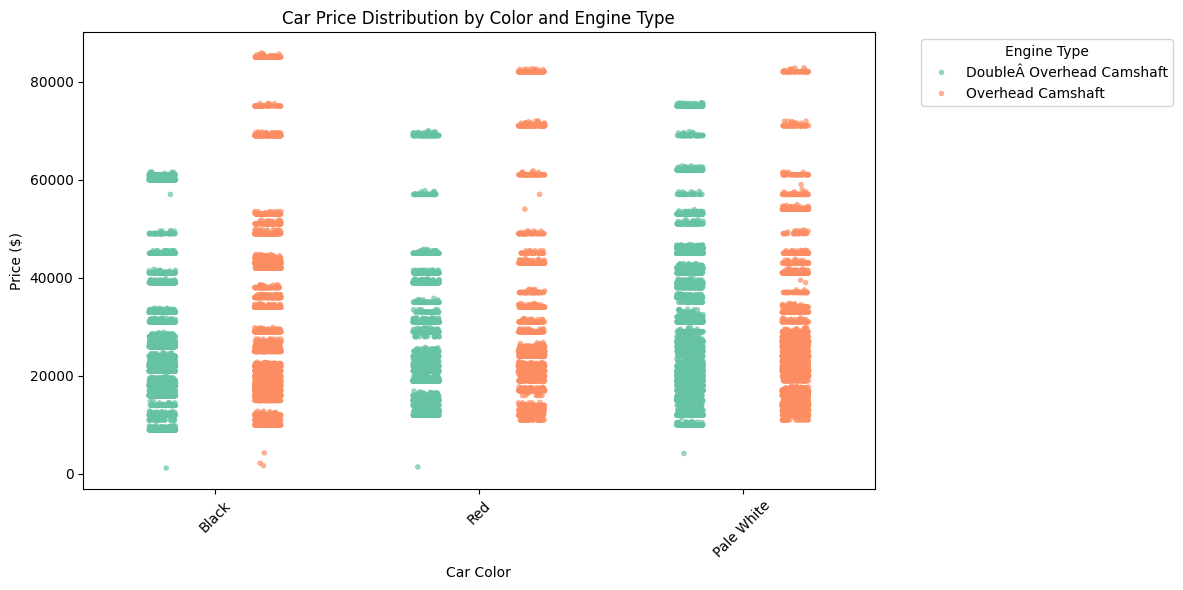

In [361]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

plt.figure(figsize=(12, 6))
sns.stripplot(data=car_df, x="Color", y="Price ($)", hue="Engine",
              dodge=True, jitter=True, palette="Set2", alpha=0.7, size=4)
plt.title("Car Price Distribution by Color and Engine Type")
plt.xlabel("Car Color")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.legend(title="Engine Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [362]:
#continuation of Q.11

variation = car_df.groupby("Color")["Price ($)"].std().reset_index(name="Price_StdDev")
variation.sort_values(by="Price_StdDev", ascending=False, inplace=True)
variation


Color  Price_StdDev
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859

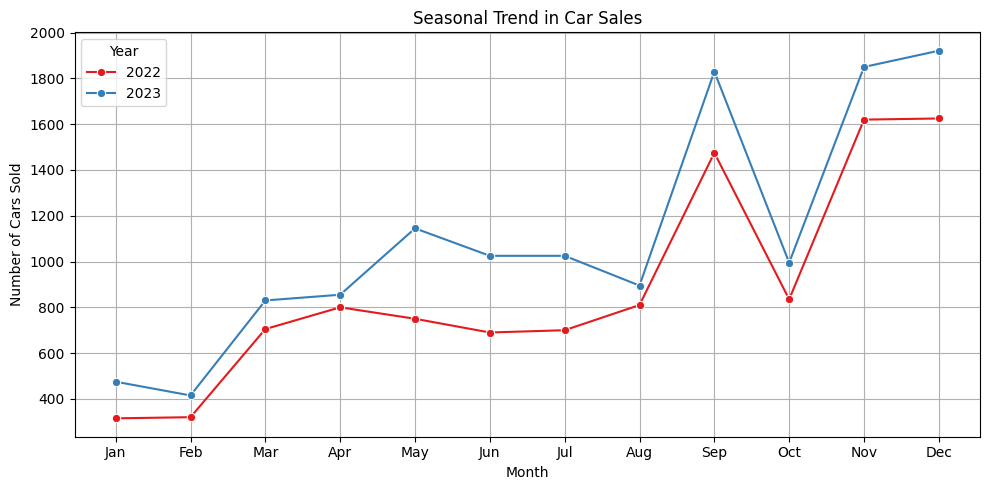


Observation: The line chart indicates that car sales exhibit seasonal trends, with some months showing consistently higher or lower sales across different years.


In [363]:
#12. Is there any seasonal trend in car sales based on the date of sale?

car_df['Month'] = pd.to_datetime(car_df['Date']).dt.month
car_df["Year"] = pd.to_datetime(car_df['Date']).dt.year
monthly_sales = car_df.groupby(["Year", "Month"])["Car_id"].count().reset_index(name="count")
monthly_sales["Month"]=monthly_sales["Month"].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_sales["Month"] = pd.Categorical(monthly_sales["Month"],
                                        categories=month_order,
                                        ordered=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x="Month", y="count", hue="Year", marker="o", palette="Set1")
plt.title("Seasonal Trend in Car Sales")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.grid(True)
plt.tight_layout()
plt.show()
print()
print("Observation: The line chart indicates that car sales exhibit seasonal trends, with some months showing consistently higher or lower sales across different years.")


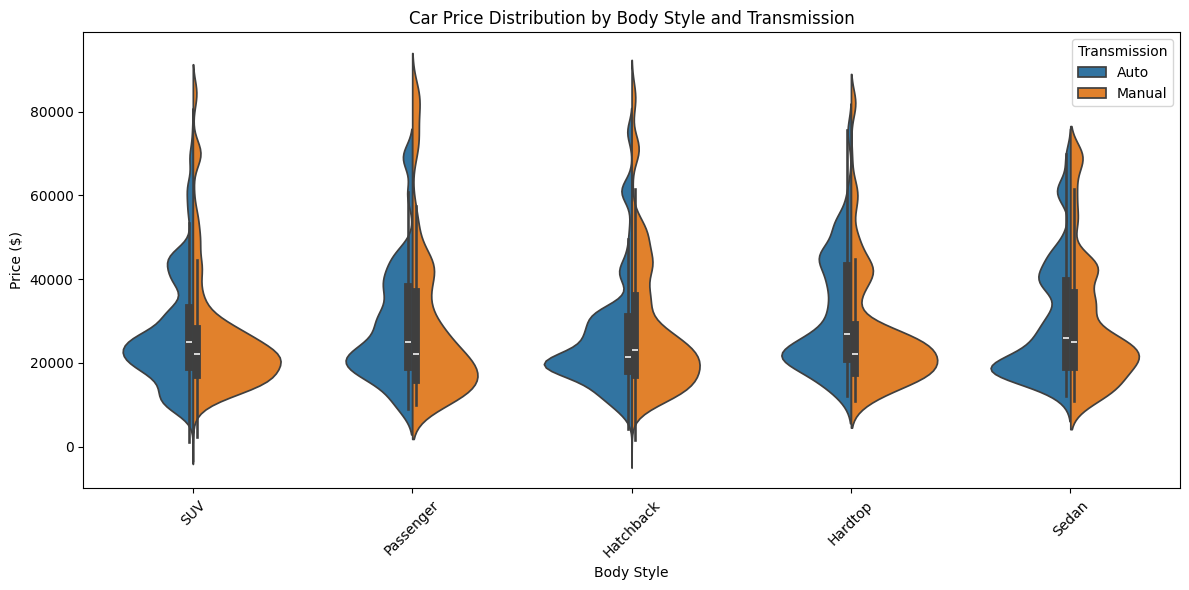

In [364]:
#13.  How does the car price distribution change when considering different combinations of body style and transmission type?



plt.figure(figsize=(12,6))
sns.violinplot(data=car_df, x="Body Style", y="Price ($)", hue="Transmission", split=True)
plt.title("Car Price Distribution by Body Style and Transmission")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [365]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

print(car_df[[ "Annual Income", "Price ($)"]].corr().round(3))
print()
print("Correlation between Annual Income and Price is not significant and thus we can't establish any linear relationship between the two.")
print()
print("Correlation can't be calculated for categorical variables such as Engine size here. Instead we can visualize the relationship using different plots or summary table")

               Annual Income  Price ($)
Annual Income          1.000      0.012
Price ($)              0.012      1.000

Correlation between Annual Income and Price is not significant and thus we can't establish any linear relationship between the two.

Correlation can't be calculated for categorical variables such as Engine size here. Instead we can visualize the relationship using different plots or summary table


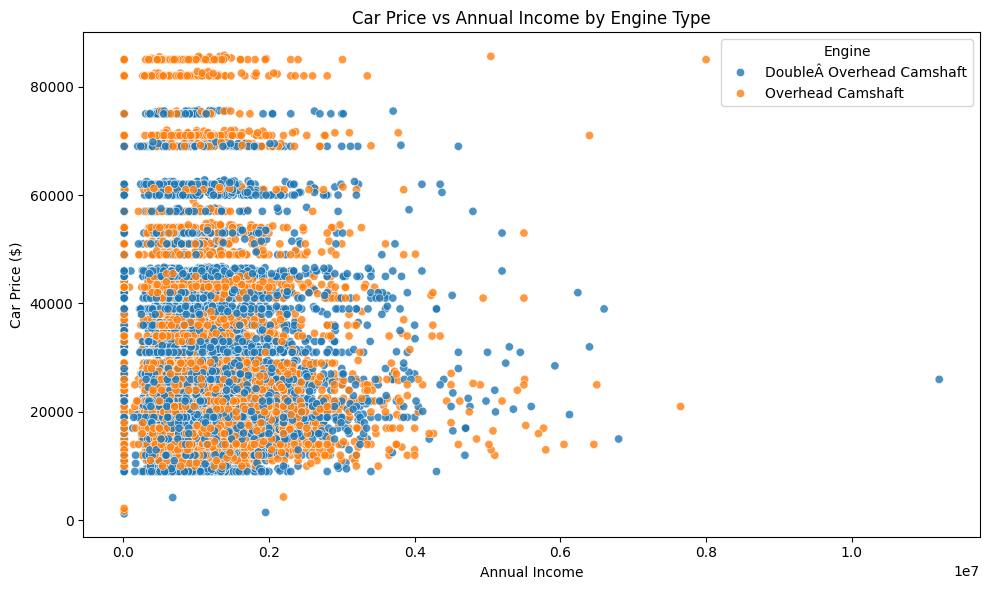

In [366]:
#continuation of Q.14

plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_df, x="Annual Income", y="Price ($)", hue="Engine", alpha=0.8)
plt.title("Car Price vs Annual Income by Engine Type")
plt.xlabel("Annual Income")
plt.ylabel("Car Price ($)")
plt.tight_layout()
plt.show()

In [367]:
#15. How does the average car price vary across different car models and engine types.

car_df.pivot_table(index="Model", columns="Engine", values="Price ($)", aggfunc="mean").round(2)

Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                      37986.38                NaN
3000GT                     22764.33           21770.66
300M                       21394.89                NaN
323i                       16744.63           21038.16
328i                       21069.15           38676.18
...                             ...                ...
Viper                      32118.48           26052.38
Voyager                    22066.03           33995.68
Windstar                   25145.64           17100.27
Wrangler                   21145.29           18742.94
Xterra                     15940.46           31072.50

[154 rows x 2 columns]

# **EDA 3**
**Amazon Sales Data**

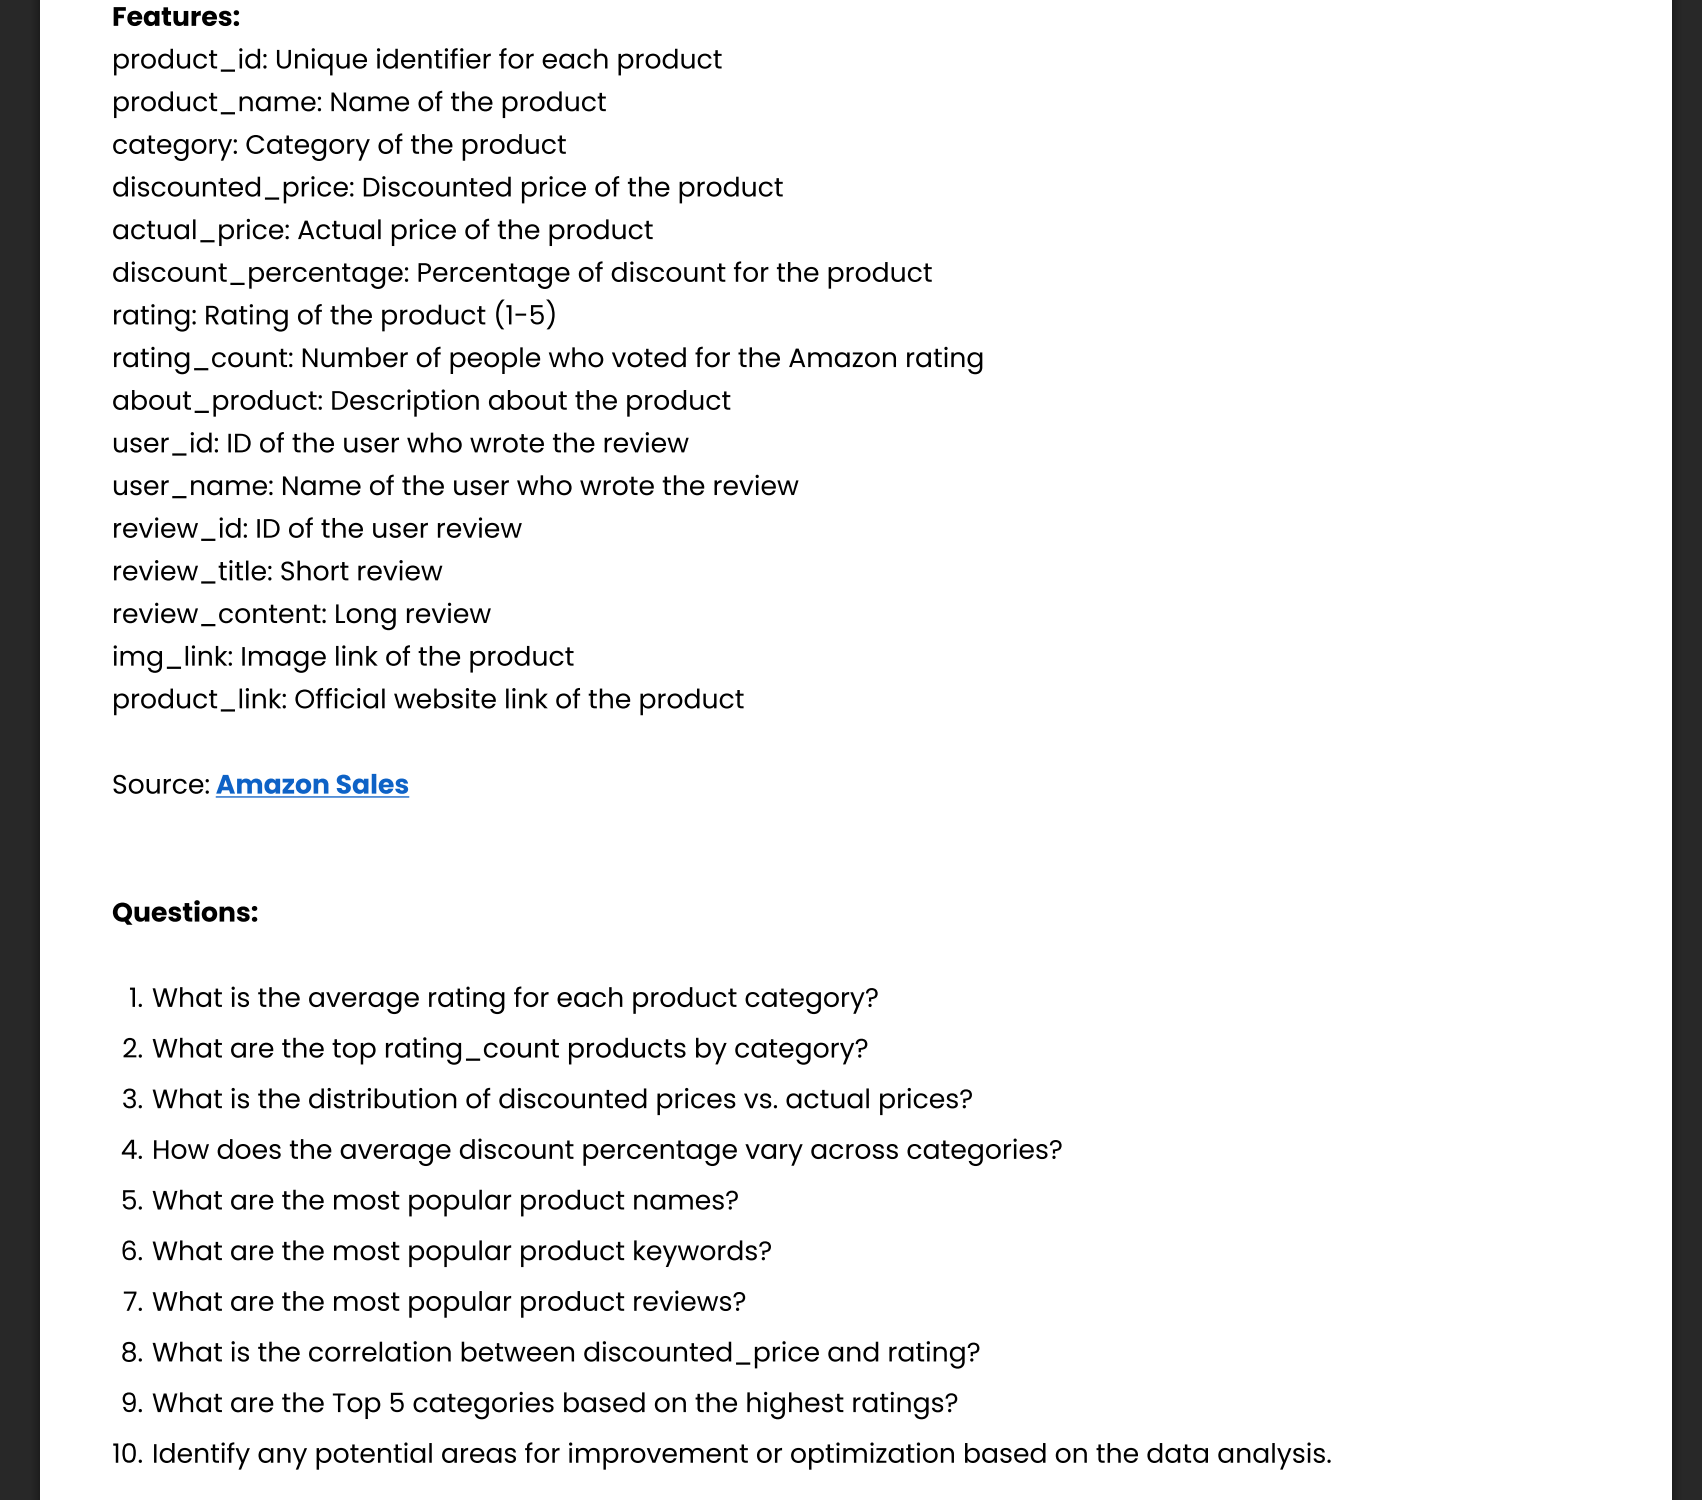

In [368]:
amz_df=pd.read_csv("amazon.csv")
amz_df.sample(5)

product_id                                       product_name  \
712   B07YNTJ8ZM  Zebronics ZEB-COUNTY 3W Wireless Bluetooth Por...   
1198  B09SPTNG58  Crompton Sea Sapphira 1200 mm Ultra High Speed...   
830   B00CEQEGPI  Logitech MK270r USB Wireless Keyboard and Mous...   
561   B0B5YBGCKD  POPIO Tempered Glass Compatible for iPhone 13 ...   
357   B0746JGVDS  ELV Car Mount Adjustable Car Phone Holder Univ...   

                                               category discounted_price  \
712    Electronics|HomeAudio|Speakers|BluetoothSpeakers             ₹549   
1198  Home&Kitchen|Heating,Cooling&AirQuality|Fans|C...           ₹1,449   
830   Computers&Accessories|Accessories&Peripherals|...           ₹1,345   
561   Electronics|Mobiles&Accessories|MobileAccessor...             ₹150   
357   Electronics|Mobiles&Accessories|MobileAccessor...             ₹349   

     actual_price discount_percentage rating rating_count  \
712          ₹999                 45%    3.9       64,705   
1198       ₹2,349                 38%    3.9        9,019   
830        ₹2,295                 41%    4.2       17,413   
561          ₹599                 75%    4.3          714   
357          ₹999                 65%    3.9       46,399   

                                          about_product  \
712   Zeb-county is a compact and handy portable spe...   
1198  PRODUCT: Crompton's corrosion resistant high p...   
830   Easy to Use: This wireless keyboard and mouse ...   
561   Compatible Device: iPhone 13 / iPhone 13 Pro /...   
357   PRODUCT FEATURES : ELV Easy one touch mounting...   

                                                user_id  \
712   AFQ44B5ISCXUWKFHZL7HTRTYWZKA,AF3IECP2JCTQZRF55...   
1198  AENJBTR2KDJMOAEQA4AROLV244QQ,AE666QCFHN4ZT5Q6Y...   
830   AF6FWJDVYLDXCQ3XUAMYDIMTDE3Q,AEVREAMLELSSIBFZA...   
561   AFUWV4HNHDWYGFGEHEMCKPR7HPBA,AH2QS2327TLYTXS5Y...   
357   AGHVT7WT5L4HJE2K7U2JG2YCED2Q,AEG6NCZPUEEC3YY26...   

                                              user_name  \
712   Bhuwaneshwar kathlane,Jainit mukeshbhai Chauha...   
1198  Mahenddhra,Pavan Sisode,Archana Sekhar,chandan...   
830   Jaldeep,karan,Kalyanchakravarti Nemana,Swapnil...   
561   vivek vinod,robin mohanty,Sadique a.,Harsh,raj...   
357   Debanshu Saha,Dhineshkumar,Amazon Customer,Ama...   

                                              review_id  \
712   R2SK5PPC2ZKCL5,RD7IHEAUK0KA6,R32GOT9K2GCKQG,R2...   
1198  R19X0TLJFOL8RV,R3H2XBOSPH6NZR,R187CEHOWSXVIR,R...   
830   RUGMBPEU1O5TW,R8ZNW2WNUSCA3,R19M1F36BH6M45,R3C...   
561   RM88OEEDBGL7E,RA49OAQBPGOY1,R1P18CRYE9Z987,R1N...   
357   RRCQZ1NUT86W1,R7U9X4A8OGS3I,R26604Y3P1D000,R1K...   

                                           review_title  \
712   To good,Build material,Super,Good product,Budg...   
1198  little bit good,Not Bad,sleek,good,Good produc...   
830   Great keyboard, average mouse.,Good for daily ...   
561   Great product if you don’t mind the edges,Reco...   
357   Good quality. Does not make sound. A bit less ...   

                                         review_content  \
712   Bahut hi achha product hai badhiya saund and b...   
1198  not a eassy to bare this product , in this pro...   
830   EDIT: This doesn't change my review (actually,...   
561   It’s a no brainer to get this. Just that the e...   
357   Good quality. Does not make sound. A bit less ...   

                                               img_link  \
712   https://m.media-amazon.com/images/I/41goRo3UXh...   
1198  https://m.media-amazon.com/images/W/WEBP_40237...   
830   https://m.media-amazon.com/images/W/WEBP_40237...   
561   https://m.media-amazon.com/images/I/41XaIckgKI...   
357   https://m.media-amazon.com/images/I/41ZK4aM4zg...   

                                           product_link  
712   https://www.amazon.in/Zebronics-Zeb-County-Blu...  
1198  https://www.amazon.in/CROMPTON-Sapphira-Ultra-...  
830   https://www.amazon.in/Logitech-Wireless-mk270r...  
561   https://www.amazon.in/POPIO-Comp

In [369]:
amz_df.duplicated().sum()

np.int64(0)

In [370]:
amz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [371]:
amz_df["rating"].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [372]:
amz_df["rating"]=pd.to_numeric(amz_df["rating"], errors="coerce")
amz_df.dropna(inplace=True)

In [373]:
amz_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [374]:
amz_df["actual_price"].unique()

array(['₹1,099', '₹349', '₹1,899', '₹699', '₹399', '₹1,000', '₹499',
       '₹299', '₹999', '₹339', '₹799', '₹700', '₹899', '₹24,999',
       '₹21,990', '₹1,799', '₹22,900', '₹199', '₹19,990', '₹19,999',
       '₹1,999', '₹750', '₹599', '₹666.66', '₹1,900', '₹45,999', '₹695',
       '₹34,999', '₹1,599', '₹1,208', '₹475', '₹395', '₹2,199', '₹500',
       '₹2,100', '₹12,999', '₹1,399', '₹21,999', '₹1,499', '₹47,900',
       '₹845', '₹1,400', '₹14,990', '₹2,999', '₹42,999', '₹30,990',
       '₹3,999', '₹249', '₹19,125', '₹1,299', '₹39,999', '₹40,990',
       '₹52,900', '₹800', '₹31,999', '₹1,809', '₹29,999', '₹65,000',
       '₹20,000', '₹23,990', '₹15,999', '₹44,990', '₹44,999', '₹1,700',
       '₹595', '₹27,990', '₹1,200', '₹34,990', '₹1,500', '₹49,990',
       '₹931', '₹2,399', '₹1,339', '₹20,900', '₹15,990', '₹1,600', '₹849',
       '₹1,199', '₹22,990', '₹2,499', '₹47,990', '₹485', '₹18,990',
       '₹11,000', '₹70,900', '₹549', '₹35,999', '₹1,699', '₹31,990',
       '₹9,990', '₹16,99

In [375]:
amz_df["discounted_price"].unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [376]:
col=["discounted_price", "actual_price"]
amz_df[col]=amz_df[col].apply(lambda x: x.str.replace(",",'',regex=False).str[1:])


In [377]:
amz_df[col]=amz_df[col].apply(pd.to_numeric,errors="coerce")

In [378]:
amz_df[col].isnull().sum()

discounted_price    0
actual_price        0
dtype: int64

In [379]:
amz_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   object 
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   object 
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

In [380]:
amz_df["discount_percentage"].unique()

array(['64%', '43%', '90%', '53%', '61%', '85%', '65%', '23%', '50%',
       '33%', '55%', '63%', '69%', '60%', '13%', '44%', '38%', '39%',
       '46%', '41%', '70%', '42%', '72%', '25%', '51%', '73%', '0%',
       '80%', '28%', '67%', '58%', '35%', '45%', '62%', '54%', '27%',
       '77%', '56%', '78%', '31%', '86%', '47%', '37%', '75%', '32%',
       '68%', '66%', '22%', '57%', '17%', '52%', '88%', '20%', '59%',
       '40%', '26%', '29%', '83%', '71%', '15%', '76%', '48%', '82%',
       '36%', '89%', '87%', '24%', '34%', '11%', '91%', '7%', '19%',
       '79%', '21%', '81%', '18%', '49%', '30%', '84%', '10%', '6%',
       '14%', '74%', '4%', '5%', '16%', '8%', '2%', '94%', '12%', '3%',
       '9%'], dtype=object)

In [381]:
amz_df[["discount_percentage", "rating_count"]] = amz_df[["discount_percentage", "rating_count"]].apply(
    lambda col: col.str.replace(r"[%,]", "", regex=True)
)


In [382]:
amz_df[["discount_percentage", "rating_count"]] = amz_df[["discount_percentage", "rating_count"]].apply(
    lambda col: pd.to_numeric(col, errors="coerce")
)


In [383]:
amz_df[["discount_percentage", "rating_count"]].isnull().sum()

discount_percentage    0
rating_count           0
dtype: int64

In [384]:
amz_df.info()
amz_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1462 non-null   object 
 1   product_name         1462 non-null   object 
 2   category             1462 non-null   object 
 3   discounted_price     1462 non-null   float64
 4   actual_price         1462 non-null   float64
 5   discount_percentage  1462 non-null   int64  
 6   rating               1462 non-null   float64
 7   rating_count         1462 non-null   int64  
 8   about_product        1462 non-null   object 
 9   user_id              1462 non-null   object 
 10  user_name            1462 non-null   object 
 11  review_id            1462 non-null   object 
 12  review_title         1462 non-null   object 
 13  review_content       1462 non-null   object 
 14  img_link             1462 non-null   object 
 15  product_link         1462 non-null   object

np.int64(0)

In [385]:
#1. What is the average rating for each product category?

amz_df.groupby("category")["rating"].mean().sort_values(ascending=False)

category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.5
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    3.4
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders                          3.3
Name: rating, Length: 211, dtype: float64

In [386]:
#2. What are the top rating_count products by category?

top_products = amz_df.sort_values(by="rating_count", ascending=False).groupby("category").head(3)[["category","product_name", "product_id","rating_count"]].reset_index(drop=True)
print("Top 3 products by each category by rating_count are:\n")
top_products

Top 3 products by each category by rating_count are:



category  \
0    Electronics|HomeTheater,TV&Video|Accessories|C...   
1    Electronics|HomeTheater,TV&Video|Accessories|C...   
2    Electronics|HomeTheater,TV&Video|Accessories|C...   
3    Electronics|Headphones,Earbuds&Accessories|Hea...   
4    Electronics|Headphones,Earbuds&Accessories|Hea...   
..                                                 ...   
444  Home&Kitchen|Heating,Cooling&AirQuality|Humidi...   
445  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
446        Electronics|HomeTheater,TV&Video|Projectors   
447  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
448        Electronics|HomeTheater,TV&Video|Projectors   

                                          product_name  product_id  \
0    Amazon Basics High-Speed HDMI Cable, 6 Feet - ...  B014I8SSD0   
1    Amazon Basics High-Speed HDMI Cable, 6 Feet (2...  B014I8SX4Y   
2    AmazonBasics Flexible Premium HDMI Cable (Blac...  B07KSMBL2H   
3    boAt Bassheads 100 in Ear Wired Earphones with...  B07GQD4K6L   
4    boAt Bassheads 100 in Ear Wired Earphones with...  B07GPXXNNG   
..                                                 ...         ...   
444  AGARO Glory Cool Mist Ultrasonic Humidifier, 4...  B09P182Z2H   
445  Kitchengenix's Mini Waffle Maker 4 Inch- 350 W...  B0BJYSCWFQ   
446  WZATCO Pixel | Portable LED Projector | Native...  B0BLV1GNLN   
447  Kitchenwell Multipurpose Portable Electronic D...  B0B4SJKRDF   
448  WANBO X1 Pro (Upgraded) | Native 1080P Full HD...  B0BNDD9TN6   

     rating_count  
0          426973  
1          426973  
2          426973  
3          363713  
4          363713  
..            ...  
444           168  
445            39  
446            27  
447             7  
448             7  

[449 rows x 4 columns]

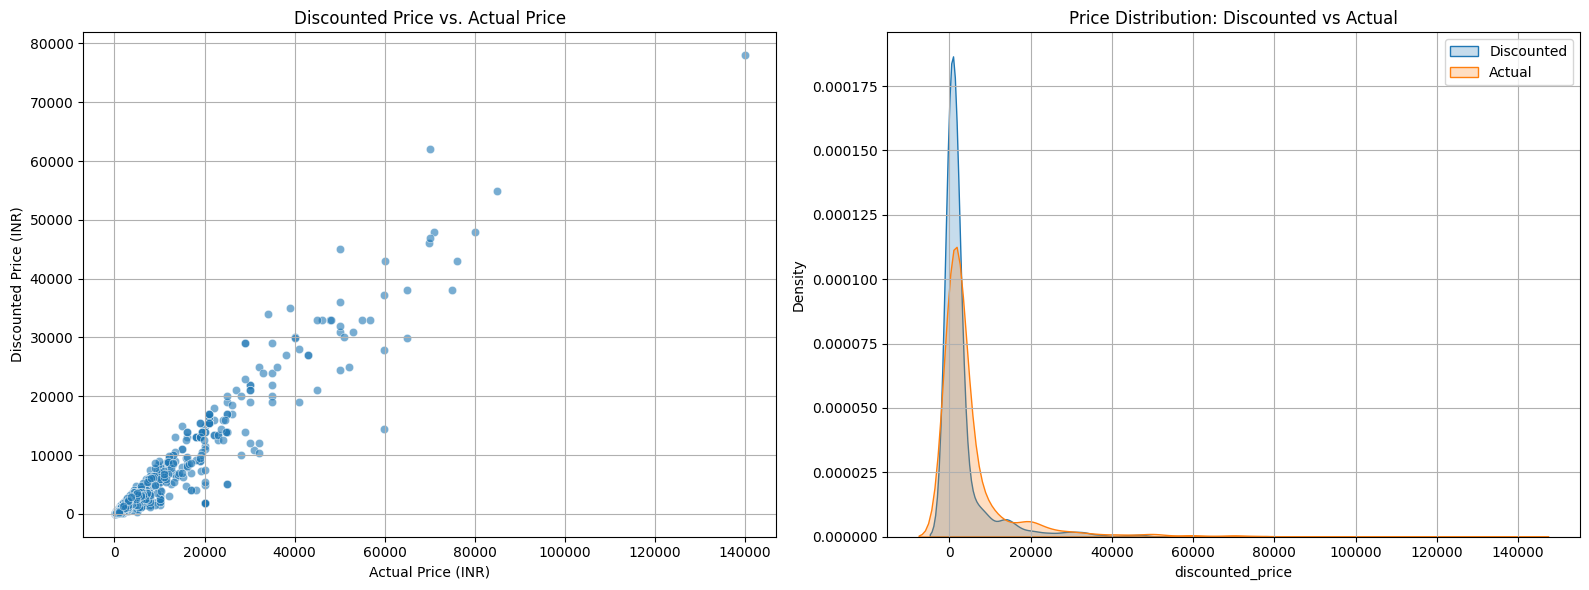

In [387]:
#3. What is the distribution of discounted prices vs. actual prices?


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(data=amz_df, x='actual_price', y='discounted_price', alpha=0.6, ax=axes[0])
axes[0].set_title('Discounted Price vs. Actual Price')
axes[0].set_xlabel('Actual Price (INR)')
axes[0].set_ylabel('Discounted Price (INR)')
axes[0].grid(True)


sns.kdeplot(amz_df["discounted_price"], fill=True, label="Discounted", ax=axes[1])
sns.kdeplot(amz_df["actual_price"], fill=True, label="Actual", ax=axes[1])
axes[1].set_title("Price Distribution: Discounted vs Actual")
axes[1].legend()
axes[1].grid(True)


plt.tight_layout()
plt.show()



In [388]:
#4.  How does the average discount percentage vary across categories?

amz_df.groupby("category")["discount_percentage"].mean().round(2)

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens      5.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens    17.5
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|StickBallpointPens          13.0
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers                                                      0.0
Name: discount_percentage, Length: 211, dtype: float64

In [389]:
#5. What are the most popular product names?

top_product_names=amz_df.sort_values(by="rating_count", ascending=False)["product_name"].head(5)
print("\nTop 5 Products by Rating Count (indicative of popularity):\n",top_product_names)



Top 5 Products by Rating Count (indicative of popularity):
 47     Amazon Basics High-Speed HDMI Cable, 6 Feet - ...
65     Amazon Basics High-Speed HDMI Cable, 6 Feet (2...
12     AmazonBasics Flexible Premium HDMI Cable (Blac...
684    AmazonBasics Flexible Premium HDMI Cable (Blac...
400    boAt Bassheads 100 in Ear Wired Earphones with...
Name: product_name, dtype: object


In [390]:
#6. What are the most popular product keywords?

from collections import Counter
import re

text_data = amz_df['product_name'].astype(str) + " " + amz_df['about_product'].astype(str)
all_words = []
for text in text_data:
    # Simple tokenization: convert to lowercase and split by non-alphanumeric characters
    words = re.findall(r'\b\w+\b', text.lower())
    all_words.extend(words)

# Remove common stopwords
stopwords = set(sns.load_dataset('titanic')['sex'].astype(str).unique().tolist() + ['the', 'and', 'for', 'with', 'this', 'that', 'you', 'are', 'from', 'its', 'your', 'product', 'about', 'a', 'an', 'is', 'of', 'in', 'it', 'to', 'on', 'or', 'can', 'new', 'by', 'up', 'have', 'has', 'be', 'will', 'be', 'as', 'at', 'amazon', 'description']) # Added some common words and placeholder for an actual stopword list
filtered_words = [word for word in all_words if word not in stopwords and len(word) > 2] # Filter short words

word_counts = Counter(filtered_words)
most_common_keywords = word_counts.most_common(10) # Top 10 keywords
print("Most popular product keywords:")
for word, count in most_common_keywords:
    print(f"- {word}: {count}")

Most popular product keywords:
- usb: 1639
- cable: 1320
- charging: 903
- type: 870
- warranty: 814
- high: 670
- power: 650
- devices: 638
- easy: 635
- compatible: 633


In [391]:
#7. What are the most popular product reviews?

popular_product_reviews= amz_df.sort_values(by=["rating", "rating_count"], ascending=[False, False]).head(10)[["product_name", "rating_count","rating", "review_title","review_content"]]
popular_product_reviews

product_name  rating_count  rating  \
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...            23     5.0   
174   Syncwire LTG to USB Cable for Fast Charging Co...             5     5.0   
1145  Swiffer Instant Electric Water Heater Faucet T...         53803     4.8   
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...          3964     4.8   
1201  Oratech Coffee Frother electric, milk frother ...            28     4.8   
459   Spigen EZ Fit Tempered Glass Screen Protector ...          7779     4.7   
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...          5935     4.7   
1388  Campfire Spring Chef Prolix Instant Portable W...          2591     4.7   
1275  Multifunctional 2 in 1 Electric Egg Boiling St...          2300     4.7   
1223  FIGMENT Handheld Milk Frother Rechargeable, 3-...          1729     4.7   

                                           review_title  \
775   Very responsive and stylish mouse,Simply Aweso...   
174   Good,Superb quality,Good products  nice one,Wo...   
1145  Best Product,It’s expansive but it works well ...   
1299  Loved it,Good product,Good product,It's easy t...   
1201  Oratech Best Coffee Frother,Great,My review ab...   
459   Easy to install,Best screen guard and the easi...   
249   Product installation was excellent  but delive...   
1388  Felt very useful 👌 but cable is short,Good in ...   
1275  Amazing! Value for money!,Very easy to use,2 i...   
1223  Nice product,Not as effective as claimed, just...   

                                         review_content  
775   I really like this wireless mouse it has becam...  
174   Product is good in quality. Working good with ...  
1145  Must buy best Fabulous product I recommend thi...  
1299  I have used multiple air fryers. But this one ...  
1201  Overall, I love this Oratech Coffee frother an...  
459   It is easy to install at home. The kit has all...  
249   The delivery people were not careful with the ...  
1388  I like instant heating, I didn't get warranty ...  
1275  Worth buying for eggetarians,Working great so ...  
1223  Value for money,Not as effective as claimed, j...

Correlation between discounted_price and rating is: 0.12



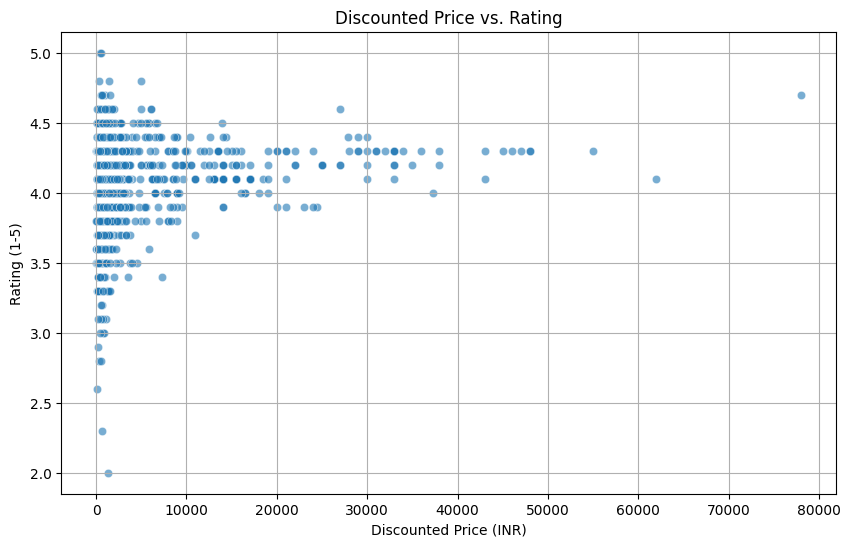

In [392]:
#8. What is the correlation between discounted_price and rating?

cor=amz_df[["discounted_price", "rating"]].corr().round(2).loc["discounted_price", "rating"]
print("Correlation between discounted_price and rating is:", cor)
print()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=amz_df, x='discounted_price', y='rating', alpha=0.6)
plt.title('Discounted Price vs. Rating')
plt.xlabel('Discounted Price (INR)')
plt.ylabel('Rating (1-5)')
plt.grid(True)
plt.show()

In [393]:
#9.  What are the Top 5 categories based on the highest ratings?

#based on highest rating only not highest average rating
top_5_cat=amz_df.sort_values(by="rating", ascending=False)[["category", "rating"]].drop_duplicates(subset="category").head(5)
top_5_cat

category  rating
775   Computers&Accessories|Accessories&Peripherals|...     5.0
174   Computers&Accessories|Accessories&Peripherals|...     5.0
1145  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...     4.8
1201  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     4.8
1299  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     4.8

In [394]:
#10. Identify any potential areas for improvement or optimization based on the data analysis.

high_discount_low_rating=amz_df[(amz_df["rating"]<3 ) & (amz_df["discount_percentage"]>50)]
high_discount_high_rating=amz_df[(amz_df["rating"]>4 ) & (amz_df["discount_percentage"]>50)]
if not high_discount_low_rating.empty:
  print("1. There might be quality issues with the product as the products with low ratings are being sold at very high discount")

if not high_discount_high_rating.empty:
  print("2. There might be mispricing and need to reconsider the discounting as the products have the scope to optimize on price")

low_avg_rating_categories = amz_df.groupby('category')['rating'].mean().nsmallest(5)
if not low_avg_rating_categories.empty:
  print("3. Categories with consistently low average ratings (potential for product/quality review)")

1. There might be quality issues with the product as the products with low ratings are being sold at very high discount
2. There might be mispricing and need to reconsider the discounting as the products have the scope to optimize on price
3. Categories with consistently low average ratings (potential for product/quality review)


# **EDA 4**

**Spotify Dataset**

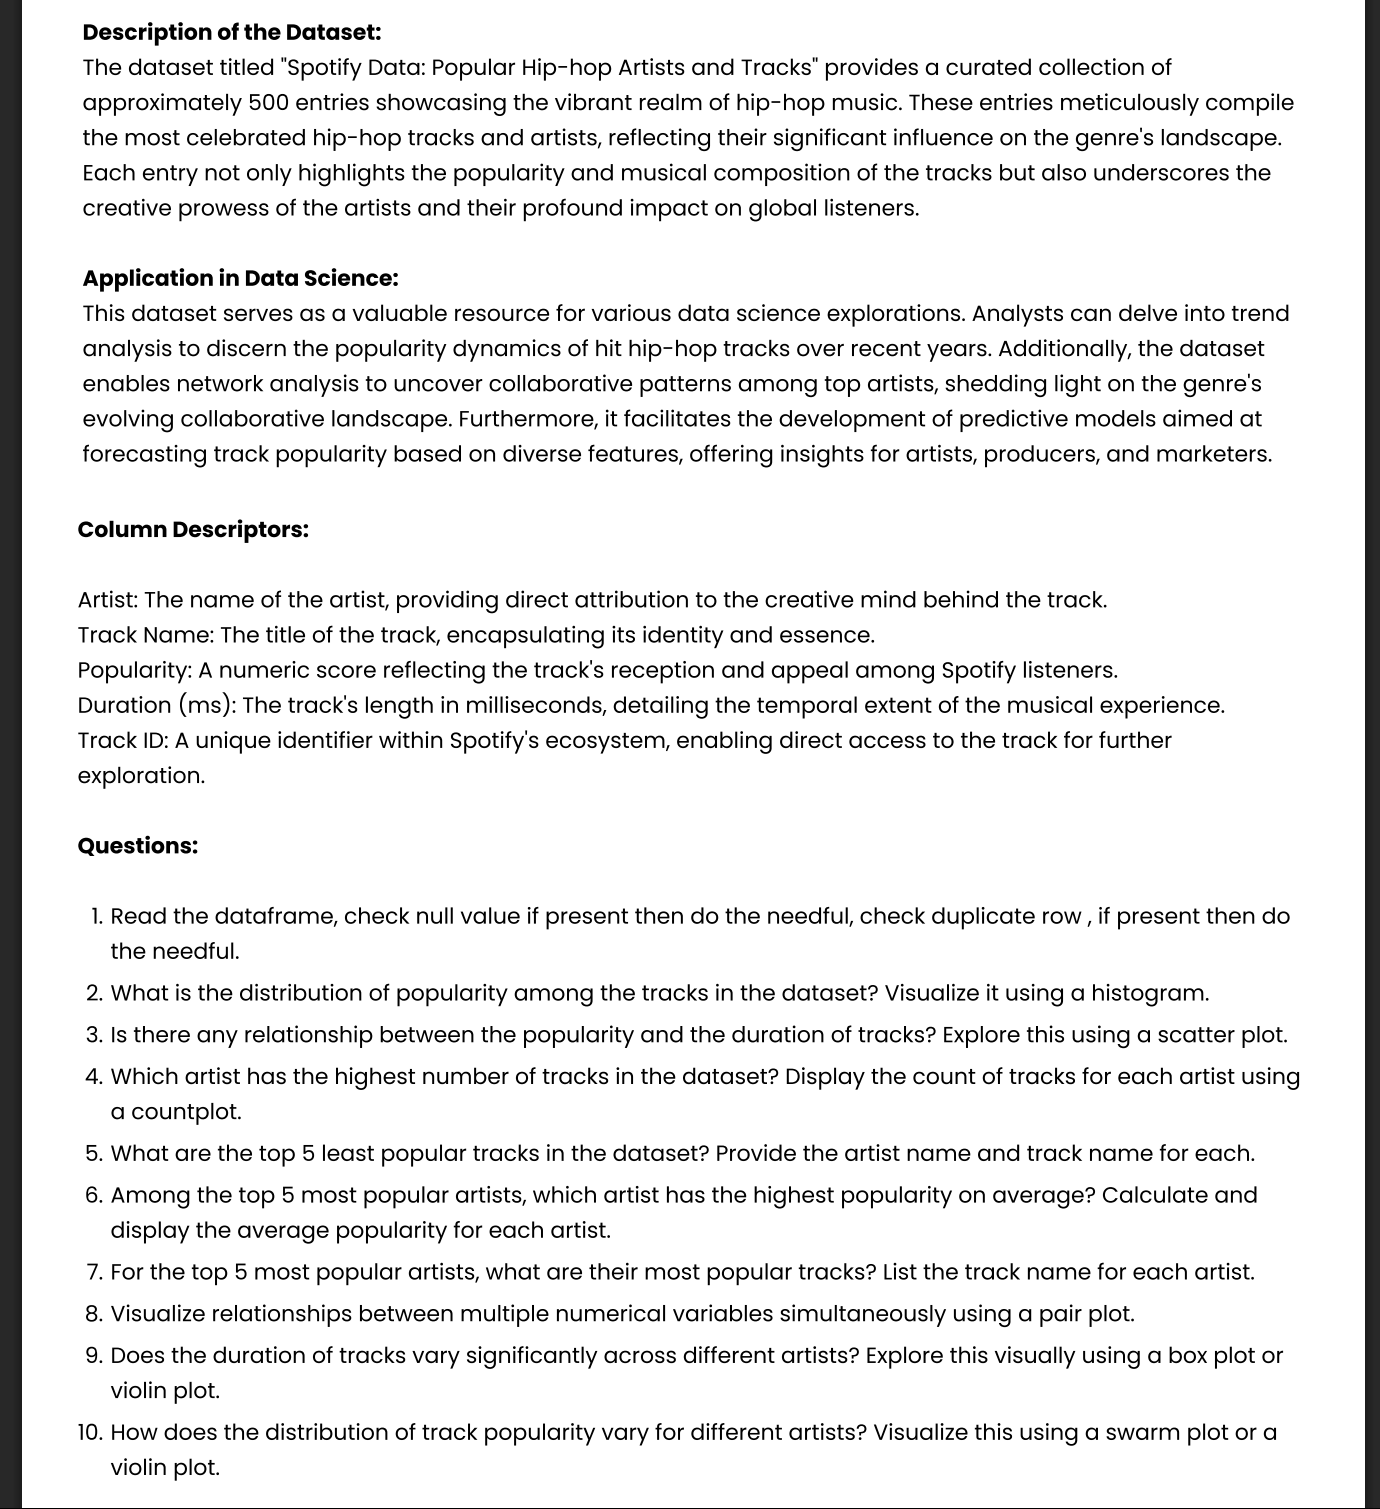

In [395]:
spotify_df=pd.read_csv("spotify.csv")
spotify_df.sample(5)

Artist                                         Track Name  \
61   Metro Boomin  Annihilate (Spider-Man: Across the Spider-Vers...   
135       J. Cole                          Power Trip (feat. Miguel)   
18    Post Malone                                         Better Now   
229      DJ Snake  SG (with Ozuna, Megan Thee Stallion & LISA of ...   
311     Lil Nas X                     MONTERO (Call Me By Your Name)   

     Popularity  Duration (ms)                Track ID  
61           79         231746  39MK3d3fonIP8Mz9oHCTBB  
135          83         241160  2uwnP6tZVVmTovzX5ELooy  
18           83         231266  7dt6x5M1jzdTEt8oCbisTK  
229          72         225600  6IPNp9PfaEqrzotY47TIWy  
311          80         137704  1SC5rEoYDGUK4NfG82494W

In [396]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [397]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

spotify_df=pd.read_csv("spotify.csv")
duplicates = spotify_df.duplicated().sum()
print("No of duplicated rows are", duplicates)

if duplicates > 0:
    spotify_df.drop_duplicates(inplace=True)
    spotify_df.reset_index(drop=True, inplace=True)
    print("Duplicates Removed!")
else:
    print("No duplicates found")

num_col=[x for x in spotify_df.columns if spotify_df[x].dtype!="O"]

for i in num_col:
  if spotify_df[i].isnull().sum()>0:
    spotify_df[i].fillna(spotify_df[i].median, inplace=True)
    print(f"Missing values in {i} filled with median")
  else:
    print(f"No missing values in {i}")

cat_col=[x for x in spotify_df.columns if spotify_df[x].dtype=="O"]

for col in cat_col:
    if spotify_df[col].isnull().sum() > 0:
        spotify_df[col].fillna(spotify_df[col].mode()[0], inplace=True)
        print(f"Filled missing values in {col} with mode.")
    else:
        print(f"No missing values in {col}.")

No of duplicated rows are 27
Duplicates Removed!
No missing values in Popularity
No missing values in Duration (ms)
No missing values in Artist.
No missing values in Track Name.
No missing values in Track ID.


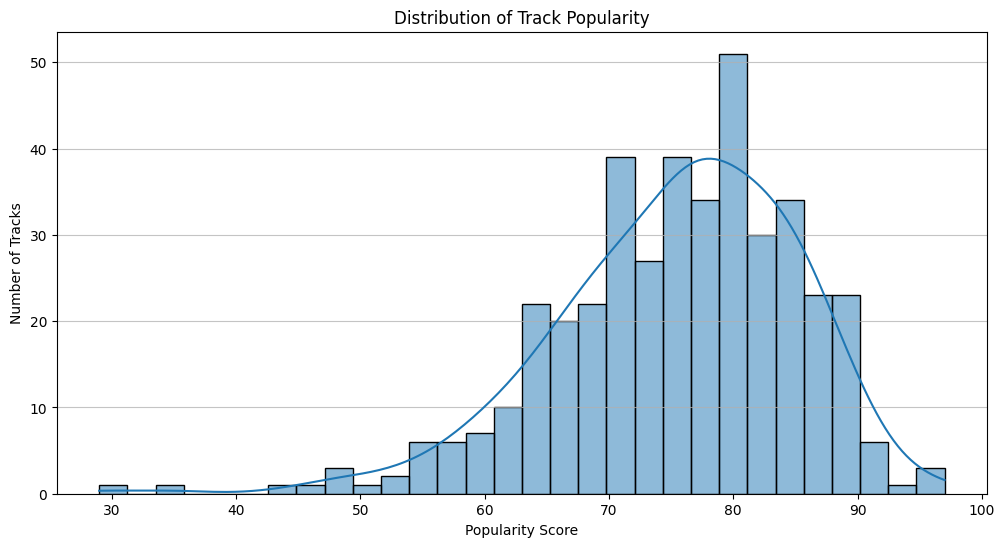

In [398]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

plt.figure(figsize=(12, 6))
sns.histplot(spotify_df['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.grid(axis='y', alpha=0.75)
plt.show()

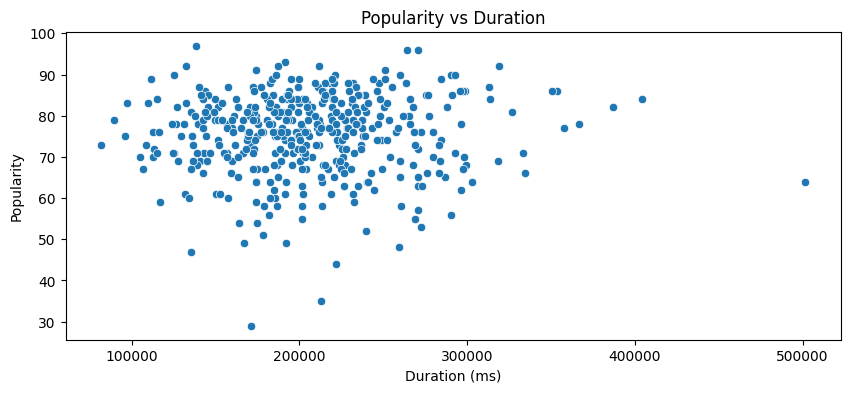


Correlation between Popularity and Duration (ms): 0.04
There appears to be a very weak or no linear relationship between popularity and track duration.


In [399]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

plt.figure(figsize=(10,4))
sns.scatterplot(data=spotify_df, x="Duration (ms)", y="Popularity")
plt.title("Popularity vs Duration")
plt.show()

print()
correlation = spotify_df['Popularity'].corr(spotify_df['Duration (ms)'])
print(f"Correlation between Popularity and Duration (ms): {correlation:.2f}")
if abs(correlation) < 0.1:
    print("There appears to be a very weak or no linear relationship between popularity and track duration.")
elif abs(correlation) < 0.3:
    print("There appears to be a weak linear relationship between popularity and track duration.")
else:
    print("There appears to be a moderate to strong linear relationship between popularity and track duration.")


Drake has the highest number of tracks



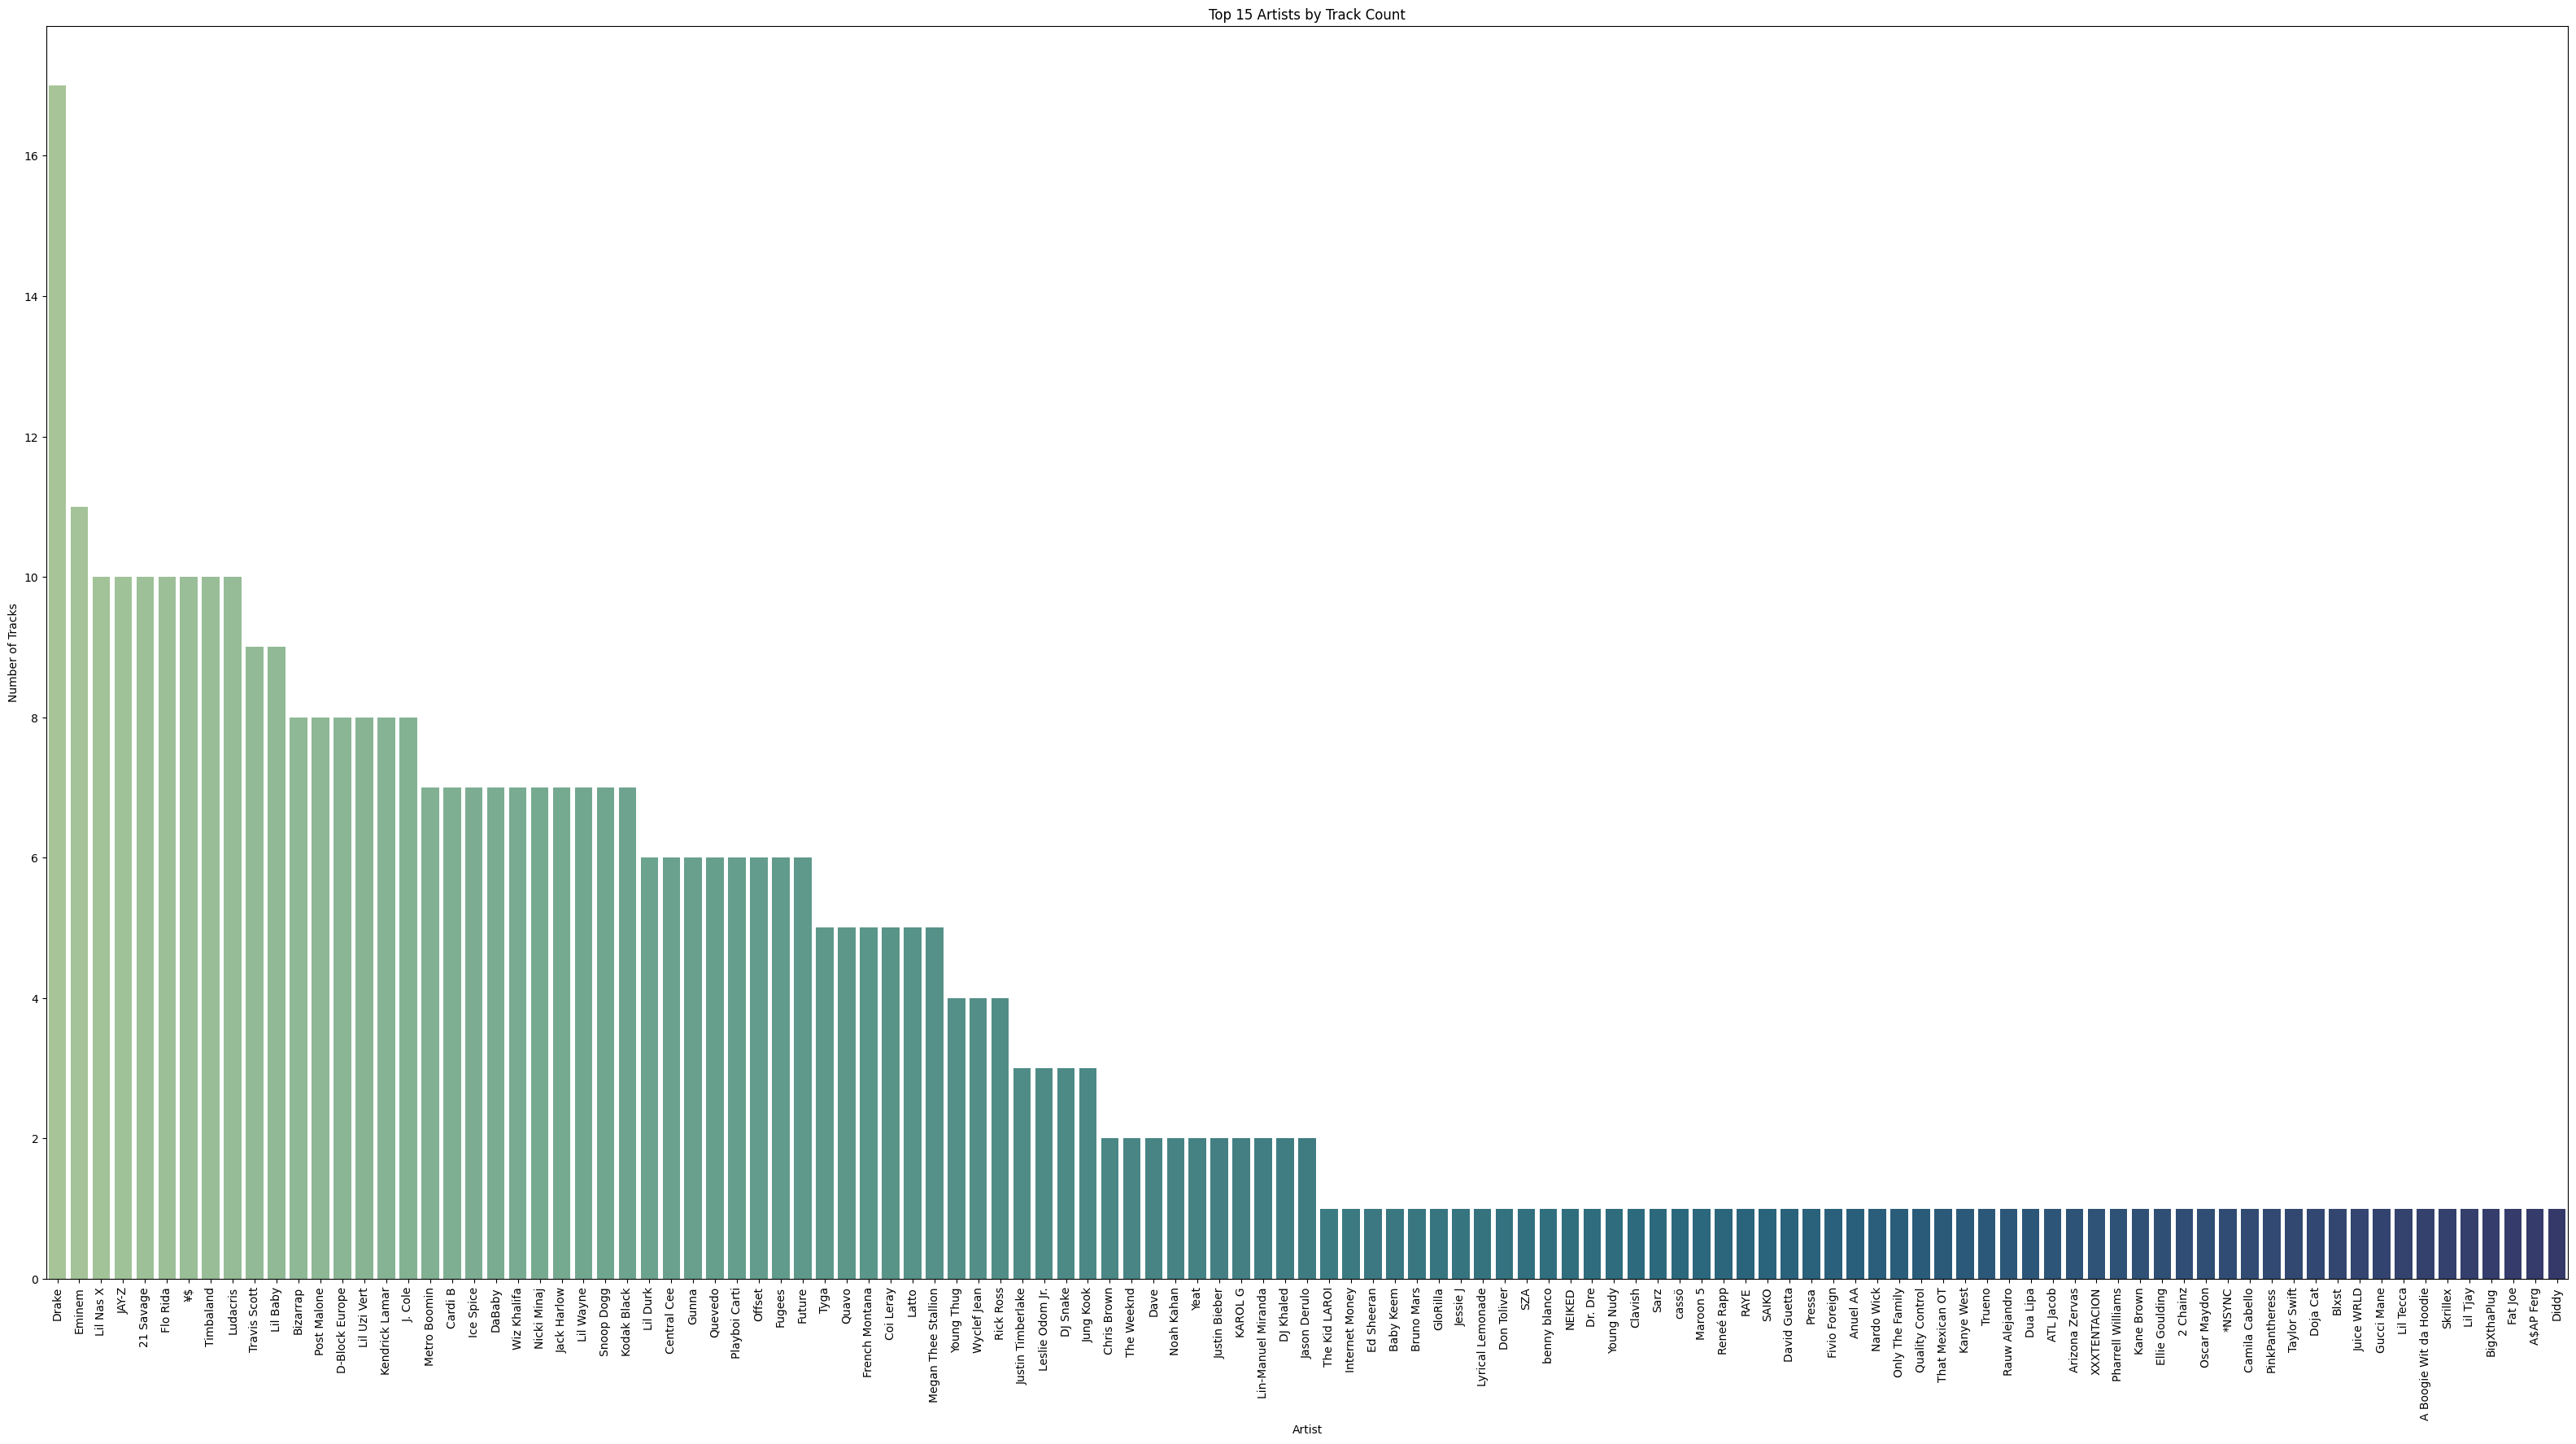

In [400]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

artist_name=spotify_df.groupby("Artist")["Track Name"].count().sort_values(ascending=False).reset_index().loc[0,"Artist"]
print(artist_name, "has the highest number of tracks")

top_artists = spotify_df["Artist"].value_counts().index

print()
plt.figure(figsize=(40, 20))
sns.countplot(data=spotify_df[spotify_df["Artist"].isin(top_artists)], x="Artist", order=top_artists, palette="crest")
plt.title("Top 15 Artists by Track Count")
plt.ylabel("Number of Tracks")
plt.xlabel("Artist")
plt.xticks(rotation=90)
plt.show()

In [401]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

least_popular_track = spotify_df.sort_values(by="Popularity", ascending=True).head(5)[["Artist","Track Name"]]
least_popular_track

Artist                     Track Name
199          Pressa  Attachments (feat. Coi Leray)
219   Justin Bieber                     Intentions
390  French Montana                Splash Brothers
213        Lil Baby                  On Me - Remix
384     Wyclef Jean      911 (feat. Mary J. Blige)

In [402]:
#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

top_5_artists=spotify_df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head(5).reset_index(name= "Average Popularity")
print(top_5_artists.loc[0,"Artist"], "has the highest popularity on average.")
print()
print(top_5_artists)


cassö has the highest popularity on average.

         Artist  Average Popularity
0         cassö           92.000000
1        Trueno           89.000000
2  David Guetta           87.000000
3  Travis Scott           86.555556
4            ¥$           85.100000


In [403]:
#7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

top_5_artists=spotify_df.groupby("Artist")["Popularity"].mean().sort_values(ascending=False).head(5).index

spotify_df[spotify_df["Artist"].isin(top_5_artists)].sort_values(by="Popularity", ascending=False).groupby("Artist").head(1)[["Artist", "Track Name"]]

Artist                    Track Name
247            ¥$                      CARNIVAL
30   Travis Scott    FE!N (feat. Playboi Carti)
134         cassö                         Prada
229        Trueno  Mamichula - con Nicki Nicole
192  David Guetta            Baby Don't Hurt Me

<Figure size 1200x800 with 0 Axes>

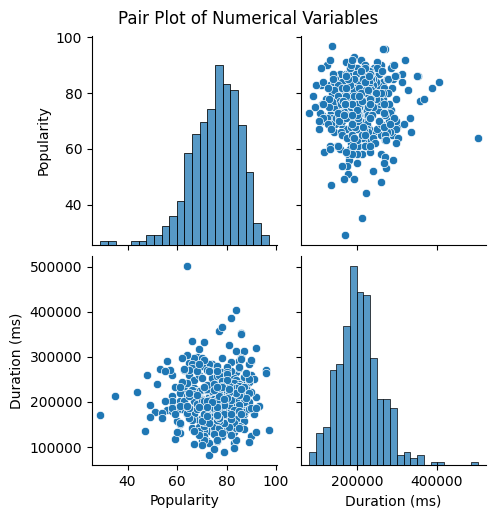

In [404]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

num_col=[x for x in spotify_df.columns if spotify_df[x].dtype!="O"]

plt.figure(figsize=(12, 8))
sns.pairplot(spotify_df[num_col])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


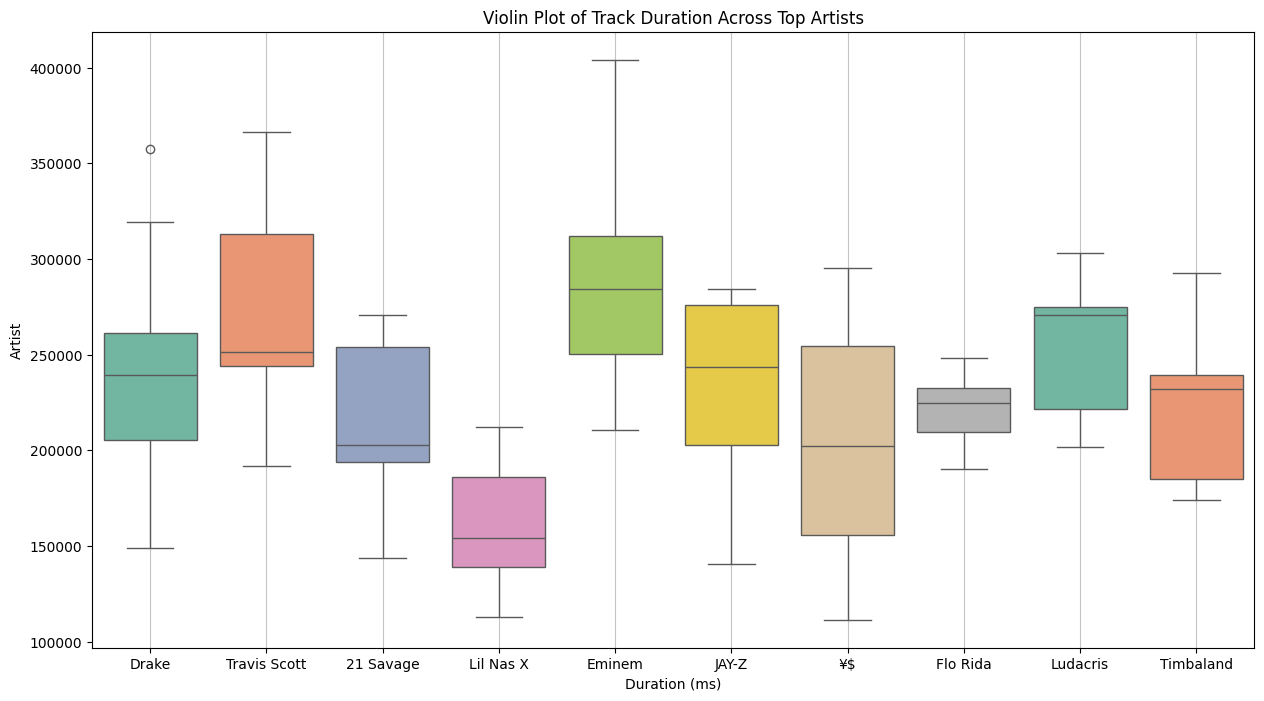

In [420]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?

artist=spotify_df["Artist"].value_counts().head(10).index
df_plot = spotify_df[spotify_df['Artist'].isin(artist)]
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_plot, y='Duration (ms)', x='Artist', palette='Set2')
plt.title('Violin Plot of Track Duration Across Top Artists')
plt.xlabel('Duration (ms)')
plt.ylabel('Artist')
plt.grid(axis='x', alpha=0.75)
plt.show()

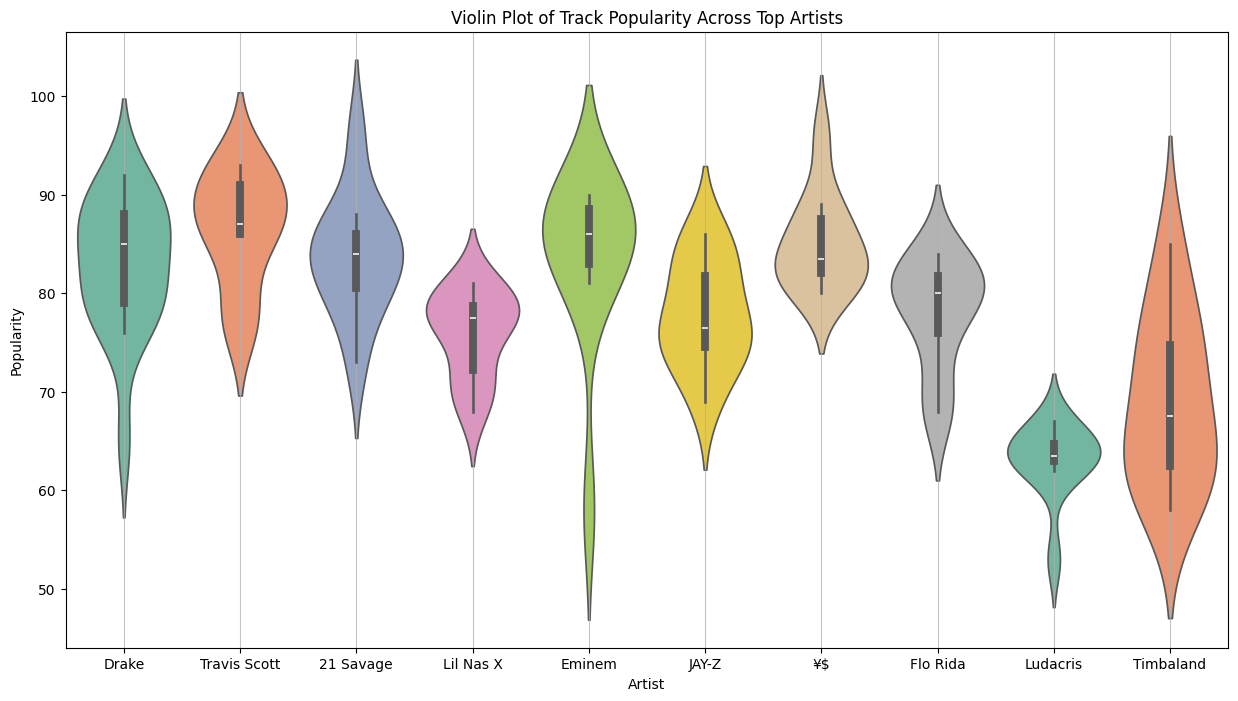

In [432]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

artist=spotify_df["Artist"].value_counts().head(10).index
df_plot = spotify_df[spotify_df['Artist'].isin(artist)]
plt.figure(figsize=(15, 8))
sns.violinplot(data=df_plot, y='Popularity', x='Artist', palette='Set2')
plt.title('Violin Plot of Track Popularity Across Top Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.grid(axis='x', alpha=0.75)
plt.show()